# Dataset NYC TLC Trip Record

## Description

Sebagai salah satu kota dengan tingkat mobilitas tertinggi di dunia, New York City memiliki tantangan besar dalam pengelolaan layanan transportasi umum, termasuk layanan taksi.

Analisis ini dilakukan untuk mengevaluasi pola permintaan layanan taksi di New York City berdasarkan data historis perjalanan taksi dari New York City Taxi dan Limousine Commission (NYC TLC). Dataset ini mencatat detail perjalanan taksi seperti waktu penjemputan, lokasi pickup dan dropoff, serta informasi biaya perjalanan.

Analisis ini berfokus pada pemahaman perilaku permintaan layanan taksi berdasarkan dimensi waktu (jam, hari, minggu) dan lokasi (zona pickup dan dropoff) guna mendukung strategi operasional perusahaan taksi di NYC.

## Latar Belakang

Perusahaan penyedia layanan taksi perlu memastikan armada mereka didistribusikan secara optimal untuk memenuhi permintaan pelanggan. Ketidakefisienan dalam pengaturan jadwal pengemudi dapat menyebabkan meningkatnya biaya operasional, waktu tunggu pelanggan yang lama, dan menurunnya kualitas layanan.

Berdasarkan data historis perjalanan taksi di New York City, diketahui bahwa lonjakan permintaan layanan terjadi secara dinamis tergantung pada waktu dan lokasi. Kondisi ini menjadi tantangan utama bagi perusahaan penyedia layanan taksi dalam mengoptimalkan armada dan jadwal pengemudi.

## Pernyataan Masalah

Perusahaan ingin mengetahui bagaimana karakteristik pola permintaan layanan taksi di Kota New York, khususnya berdasarkan dimensi waktu seperti jam, hari, dan minggu. Selain itu, perusahaan juga ingin memahami bagaimana sebaran dan distribusi permintaan layanan berdasarkan lokasi penjemputan dan penurunan.

Dengan memahami pola permintaan tersebut, perusahaan diharapkan dapat merumuskan strategi kebijakan dalam mengoptimalkan armada dan jadwal pengemudi berbasis data, yang mampu mendukung pengambilan keputusan secara lebih tepat. Kebijakan ini ditujukan dalam mengoptimalkan pengaturan armada dan jadwal pengemudi untuk efisiensi penempatan armada, meminimalisirkan waktu tunggu pelanggan yang lama, serta menekan biaya operasional terutama dalam upaya meminimalkan perjalanan kosong yang tidak menghasilkan pendapatan.

## Tujuan

1. Analisis ini dilakukan untuk mendukung perusahaan dalam merumuskan strategi pengaturan armada dan jadwal pengemudi yang lebih efektif dan efisien di Kota New York, dengan menggunakan data perjalanan taksi periode Januari 2023 sebagai dasar evaluasi dan perencanaan operasional untuk periode selanjutnya.

2. Memberikan rekomendasi dalam mengoptimalkan armada dan jadwal pengemudi berbasis pola historis perjalanan dengan mempertimbangkan penempatan armada, Pendapatan, Rute Perjalanan, Jarak Perjalanan, Risiko, dan Kualitas Layanan dalam meningkatkan perencanaan dan efisiensi operasional.

## 1. Load Dataset

Untuk menjawab pertanyaan di atas, saya akan menganalisa New York City TLC Trip Record Data Dictionary
 oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N).

Dataset yang digunakan dalam analisis ini merupakan data historis perjalanan taksi di New York City. Berikut proses load dan eksplorasi awal dataset. 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [119]:
df = pd.read_csv('NYC TLC Trip Record.csv')
df_lokasi = pd.read_csv("taxi_zone_lookup.csv")

Berikut lima baris pertama dari dataset lokasi

In [120]:
df_lokasi.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


### Informasi Zona Taksi NYC

Data zona taksi (pickup dan dropoff) pada analisis ini diperoleh dari file `taxi_zone_lookup.csv` yang disediakan oleh New York City Taxi and Limousine Commission (NYC TLC).

Setiap zona memiliki atribut:
- `Borough`: Wilayah administratif utama di NYC (Manhattan, Bronx, Brooklyn, Queens, Staten Island).
- `Zone`: Nama zona spesifik sesuai area operasional taksi.
- `service_zone`: Kategori layanan zona, yaitu:
   - `Yellow Zone`: Area utama di Manhattan.
   - `Boro Zone`: Area luar Manhattan (borough lain).
   - `EWR`: Bandara Newark.


Pada analisis ini, interpretasi zona pickup dan dropoff merujuk pada referensi dari MTA Central Business District Taxi Zones Map, yang memperlihatkan karakteristik pembagian zona di New York City berdasarkan lokasi geografis dan kepadatan aktivitas ekonominya.

Sumber: [MTA Central Business District Taxi Zones Map](https://data.ny.gov/Transportation/MTA-Central-Business-District-Taxi-Zones-Map/mrya-uksc)

---

### Integrasi Informasi Lokasi Zona Taksi

In [121]:

# Gabungkan data dengan informasi lokasi penjemputan (PULocationID)
df = df.merge(df_lokasi, left_on='PULocationID', right_on='LocationID', how='left')
df = df.rename(columns={
    'Borough': 'pickup_borough',
    'Zone': 'pickup_zone',
    'service_zone': 'pickup_service_zone'
})
df.drop('LocationID', axis=1, inplace=True)

# Gabungkan data dengan informasi lokasi penurunan (DOLocationID)
df = df.merge(df_lokasi, left_on='DOLocationID', right_on='LocationID', how='left')
df = df.rename(columns={
    'Borough': 'dropoff_borough',
    'Zone': 'dropoff_zone',
    'service_zone': 'dropoff_service_zone'
})
df.drop('LocationID', axis=1, inplace=True)

# Tampilkan 5 baris pertama kolom lokasi sebagai verifikasi
df[['PULocationID', 'pickup_borough', 'pickup_zone', 'pickup_service_zone',
    'DOLocationID', 'dropoff_borough', 'dropoff_zone', 'dropoff_service_zone']].head()

,PULocationID,pickup_borough,pickup_zone,pickup_service_zone,DOLocationID,dropoff_borough,dropoff_zone,dropoff_service_zone
0,166,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone
1,24,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone
2,223,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone
3,41,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone
4,41,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone


---

## 2. Data Understanding & Data Cleaning


Dataset dapat diakses [di sini](link kaggle belum diisi).

---

**Dataset ini berisi catatan perjalanan taksi di New York City. Berikut penjelasan kolom utamanya:**

| Kolom | Deskripsi |
|-------|-----------|
| `VendorID` | Kode vendor penyedia taksi (1 = Creative Mobile Technologies, 2 = VeriFone Inc.) |
| `lpep_pickup_datetime` | Tanggal dan waktu saat perjalanan dimulai |
| `lpep_dropoff_datetime` | Tanggal dan waktu saat perjalanan berakhir |
| `store_and_fwd_flag` | Apakah data disimpan di kendaraan sebelum dikirim (Y = ya, N = tidak) |
| `RatecodeID` | Jenis tarif ( 1 = Tarif standar, 2 = JFK, 3 = Newark, 4 = Nassau atau Westchester, 5 = Tarif yang dinegosiasikan, 6 = Perjalanan kelompok) |
| `PULocationID` | ID lokasi penjemputan (zona taksi) |
| `DOLocationID` | ID lokasi penurunan (zona taksi) |
| `passenger_count` | Jumlah penumpang dalam kendaraan |
| `trip_distance` | Jarak tempuh perjalanan (dalam mil) |
| `fare_amount` | Tarif perjalanan berdasarkan jarak dan waktu |
| `extra` | Biaya tambahan. Saat ini, ini hanya mencakup biaya tambahan 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam |
| `mta_tax` | Pajak MTA sebesar yang otomatis aktif berdasarkan tarif yang digunakan|
| `tip_amount` | Jumlah tip (hanya tercatat untuk pembayaran dengan kartu) |
| `tolls_amount` | Total biaya tol yang dibayarkan |
| `ehail_fee` | Biaya pemesanan elektronik dikenakan 1 dollar secara otomatis melalui platform enhail |
| `improvement_surcharge` | Biaya tambahan perbaikan layanan sebesar $0.30 |
| `total_amount` | Total biaya yang dibebankan ke penumpang (tidak termasuk tip tunai) |
| `payment_type` | Jenis pembayaran (1 = Kartu, 2 = Tunai, 3 = No Charge, dst.) |
| `trip_type` | Jenis perjalanan (1 = Street-hail, 2 = Dispatch) |
| `congestion_surcharge` | Biaya kemacetan $2.75 untuk wilayah tertentu di Manhattan |

---

In [122]:
df.shape

(68211, 26)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

* Total baris: 68,211
* Total kolom: 20
* Waktu (lpep_pickup_datetime) → masih bertipe object, perlu dikonversi ke datetime sebelum analisis waktu

---

### 2.1 Mengecek data unik

In [124]:
cek_data_df = pd.DataFrame({
    'column': df.columns,
    'dtype': [df[col].dtype for col in df.columns],
    'missing_%': (df.isnull().mean() * 100).round(2),
    'unique_vals': df.nunique().values,
    'sample_values': [df[col].dropna().unique()[:3] for col in df.columns]
})

cek_data_df

,column,dtype,missing_%,unique_vals,sample_values
VendorID,VendorID,int64,0.00,2,"[2, 1]"
lpep_pickup_datetime,lpep_pickup_datetime,object,0.00,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
lpep_dropoff_datetime,lpep_dropoff_datetime,object,0.00,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
store_and_fwd_flag,store_and_fwd_flag,object,6.34,2,"[N, Y]"
RatecodeID,RatecodeID,float64,6.34,6,"[1.0, 5.0, 4.0]"
PULocationID,PULocationID,int64,0.00,226,"[166, 24, 223]"
DOLocationID,DOLocationID,int64,0.00,249,"[143, 43, 179]"
passenger_count,passenger_count,float64,6.34,10,"[1.0, 2.0, 4.0]"
trip_distance,trip_distance,float64,0.00,1870,"[2.58, 1.81, 0.0]"
fare_amount,fare_amount,float64,0.00,2553,"[14.9, 10.7, 7.2]"


**Catatan:**
- Kolom null: maksimal ~6.35% (terutama pada kolom kategorikal)
- Kolom `ehail_fee`: 100% null → disarankan untuk dihapus
- Hampir tidak ada nilai negatif di kolom numerik
- Nilai 0 pada `trip_distance`, `fare_amount`, `tip_amount` perlu ditandai sebagai kemungkinan perjalanan gagal / anomali

Kolom ehail_fee memiliki 100% nilai kosong sehingga akan dihapus pada tahap pembersihan data. Selain itu, nilai 0 pada trip_distance, fare_amount, dan tip_amount perlu diperhatikan sebagai potensi anomali.

---

## 2.2 Pemeriksaan Missing Values 

In [125]:
(df.isnull().sum().sort_values(ascending=False))

ehail_fee                68211
trip_type                 4334
passenger_count           4324
congestion_surcharge      4324
RatecodeID                4324
store_and_fwd_flag        4324
payment_type              4324
dropoff_service_zone       668
dropoff_zone               426
dropoff_borough            242
pickup_service_zone        201
pickup_zone                135
pickup_borough              66
DOLocationID                 0
lpep_dropoff_datetime        0
lpep_pickup_datetime         0
VendorID                     0
PULocationID                 0
fare_amount                  0
trip_distance                0
total_amount                 0
improvement_surcharge        0
mta_tax                      0
extra                        0
tip_amount                   0
tolls_amount                 0
dtype: int64

<Axes: title={'center': 'Missing Values per Column'}>

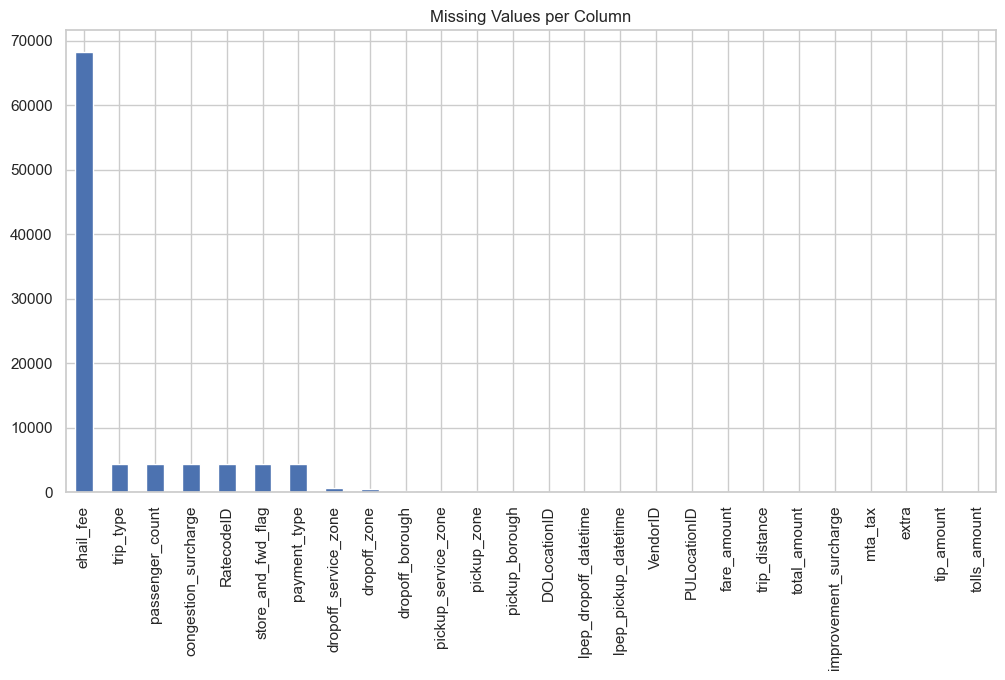

In [126]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Missing Values per Column')

- Berdasarkan analisis awal, kolom `ehail_fee` sepenuhnya kosong dan dapat di-drop. 
- Kolom dengan jumlah null identik (4,324 baris) seperti `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, dan `congestion_surcharge` kemungkinan saling berhubungan.
- Kolom trip_type berbeda 10 baris (4,334)
- kolom lokasi memilik nilai null dengan masing-masing berjumlah: `dropoff_service_zone` (668), `dropoff_zone` (426), `dropoff_borough`(242), `pickup_service_zone` (201), `pickup_zone` (135), `pickup_borough` (66)


In [127]:
# Menampilkan 5 sampel acak dari baris yang memiliki nilai null di kolom 'RatecodeID'
null_rows_sample = df[df['RatecodeID'].isnull()].sample(5, random_state=42)
null_rows_sample

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
66008,2,2023-01-16 17:03:00,2023-01-16 17:16:00,NaN,NaN,42,265,NaN,6.95,34.23,...,57.48,NaN,NaN,NaN,Manhattan,Central Harlem North,Boro Zone,NaN,Outside of NYC,NaN
63904,2,2023-01-01 00:30:00,2023-01-01 00:41:00,NaN,NaN,69,18,NaN,3.55,20.36,...,23.36,NaN,NaN,NaN,Bronx,East Concourse/Concourse Village,Boro Zone,Bronx,Bedford Park,Boro Zone
67602,2,2023-01-27 10:48:00,2023-01-27 11:13:00,NaN,NaN,89,17,NaN,3.56,18.03,...,22.84,NaN,NaN,NaN,Brooklyn,Flatbush/Ditmas Park,Boro Zone,Brooklyn,Bedford,Boro Zone
64471,2,2023-01-05 09:22:00,2023-01-05 10:14:00,NaN,NaN,42,132,NaN,18.28,77.00,...,101.46,NaN,NaN,NaN,Manhattan,Central Harlem North,Boro Zone,Queens,JFK Airport,Airports
68135,2,2023-01-31 11:45:00,2023-01-31 11:59:00,NaN,NaN,41,75,NaN,1.96,14.66,...,17.66,NaN,NaN,NaN,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem South,Boro Zone


- Masih memiliki waktu pickup & dropoff yang valid.
- Masih punya jarak tempuh & tarif → artinya bisa dianalisis secara temporal.
- Semua store_and_fwd_flag juga null, menunjukkan kemungkinan ini bukan data dari argo langsung, tapi hasil integrasi sistem lain.

---

### 2.3 Identifikasi Distribusi Nilai Null pada Masing-masing Kolom

### 2.3.1 Distribusi Nilai Null store_and_fwd_flag

In [128]:
cek_distribusi_null_store_and_fwd_flag = df['store_and_fwd_flag'].value_counts(dropna=False)
cek_distribusi_null_store_and_fwd_flag

store_and_fwd_flag
N      63579
NaN     4324
Y        308
Name: count, dtype: int64

Sebagian besar nilai pada store_and_fwd_flag adalah null, kemungkinan berasal dari integrasi data sistem yang tidak mencatat flag penyimpanan ini.

---

### 2.3.2 Distribusi Nilai Null RatecodeID

In [129]:
cek_distribusi_null_RatecodeID = df['RatecodeID'].value_counts(dropna=False)
cek_distribusi_null_RatecodeID

RatecodeID
1.0     62103
NaN      4324
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

1. Sebagian besar data `RatecodeID` memiliki nilai standar `1` (Regular), sementara nilai null relatif sedikit dan tidak signifikan mempengaruhi analisis operasional layanan taksi.
2. Terdapat nilai `99` dengan data yang sedikit

---

### 2.3.3 Distribusi Nilai Null passenger_count

In [130]:
cek_distribusi_null_passenger_count = df['passenger_count'].value_counts(dropna=False)
cek_distribusi_null_passenger_count

passenger_count
1.0    54299
2.0     5096
NaN     4324
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

Nilai null pada `passenger_count` hanya sedikit dan mayoritas data memiliki 1-2 penumpang per perjalanan, sesuai karakteristik umum layanan taksi di NYC.

---

### 2.3.4 Distribusi Nilai Null payment_type

In [131]:
cek_distribusi_null_payment_type = df['payment_type'].value_counts(dropna=False)
cek_distribusi_null_payment_type

payment_type
1.0    40686
2.0    22632
NaN     4324
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

Nilai null pada kolom payment_type kemungkinan besar disebabkan oleh metode pembayaran tertentu (seperti cash) yang tidak tercatat otomatis oleh sistem, atau data historis dari periode sebelum integrasi metode pembayaran tercatat lengkap.

---

### 2.3.5 Distribusi Nilai Null congestion_surcharge

In [132]:
cek_distribusi_null_congestion_surcharge = df['congestion_surcharge'].value_counts(dropna=False)
cek_distribusi_null_congestion_surcharge

congestion_surcharge
 0.00    46996
 2.75    16872
 NaN      4324
 2.50       16
-2.75        3
Name: count, dtype: int64

Kolom congestion_surcharge menunjukkan nilai null terutama untuk perjalanan di luar area Manhattan, atau perjalanan pada periode waktu tertentu sebelum kebijakan surcharge ini diterapkan.

---

### 2.3.6 Distribusi Nilai Null trip_type

In [133]:
cek_distribusi_null_trip_type = df['trip_type'].value_counts(dropna=False)
cek_distribusi_null_trip_type

trip_type
1.0    62476
NaN     4334
2.0     1401
Name: count, dtype: int64

Nilai null pada trip_type diperkirakan berasal dari data perjalanan sebelum penerapan categorization trip, atau perbedaan standar pencatatan antar penyedia layanan taksi.

---

### 2.3.7 Distribusi Nilai Null pickup_borough, pickup_zone, dropoff_borough, dropoff_zone

In [134]:
# Cek apakah ada missing value pada hasil merge lokasi
print("\nJumlah missing value pada kolom hasil merge lokasi:")
print(df[['pickup_borough', 'pickup_zone', 'dropoff_borough', 'dropoff_zone']].isnull().sum())


Jumlah missing value pada kolom hasil merge lokasi:
pickup_borough      66
pickup_zone        135
dropoff_borough    242
dropoff_zone       426
dtype: int64


In [135]:
df['DOLocationID'].unique()

array([143,  43, 179, 238,  74, 262,  45,  75, 166, 140, 234, 148, 255,
       186, 210, 129,  68, 260,  42,  24, 244, 146, 135, 173, 216, 142,
       265, 164,   7,  83,  95, 130, 223,  80,  48, 263, 196, 250, 226,
       239, 189,  41, 168, 162, 141,  33, 145, 151, 116, 195, 249, 235,
       160,  98,  79, 229, 181, 193, 237, 233, 264, 102,  10,  37, 258,
        82, 170,  61, 112, 231,  97,  17, 169,  96, 219, 243, 236,  56,
        36, 114, 157, 161,  54,  90,  40, 188,  70,  63, 251, 101,  92,
       153,  53,  57, 256,  65, 257, 138,  85,  52, 119, 241,  50,  78,
       228, 211, 230, 218, 121, 163, 132, 192, 184, 113, 167,  28, 177,
        86,  89, 205, 152,  88,  69,  16, 225, 137, 144,  66,  71, 127,
       134, 194,  87,  76, 147, 158,   8, 227, 248, 246, 171, 247, 182,
       180,   1, 106,  14, 198, 131, 213, 125, 197,  32, 220, 150, 207,
        49,  55, 159,  18, 174, 122,  31,  25, 100,  35, 139, 185,  15,
        22, 215,  94,  34, 155, 212, 261, 232, 242,  11,  47, 25

In [136]:
# Cek beberapa sample hasil merge untuk memastikan mapping berjalan
print("\nContoh data mapping pickup:")
print(df[['PULocationID', 'pickup_zone']].drop_duplicates().sample(5, random_state=1))


Contoh data mapping pickup:
       PULocationID                          pickup_zone
146             169                           Mount Hope
8954            124                         Howard Beach
1201             31                           Bronx Park
323             236                Upper East Side North
22165           200  Riverdale/North Riverdale/Fieldston


In [137]:
print("\nContoh data mapping dropoff:")
print(df[['DOLocationID', 'dropoff_zone']].drop_duplicates().sample(5, random_state=1))


Contoh data mapping dropoff:
       DOLocationID         dropoff_zone
131              61  Crown Heights North
66126            58         Country Club
3989            217   South Williamsburg
1155            122               Hollis
205             153          Marble Hill


Lokasi pickup dan dropoff telah berhasil disatukan datanya dilakukan berdasarkan NYC Taxi Zone Lookup Table. Namun, nilai null masih ditemukan terutama untuk lokasi di luar area cakupan NYC seperti bandara atau zona sub-urban.

---

### 2.4 Analisis Statistik Dasar
- Rata-rata jarak tempuh perjalanan taksi adalah sekitar 2.94 mil.
- Ada perjalanan dengan jarak nol (kemungkinan error atau sangat singkat).
- Perjalanan terjauh mencapai 50 mil → kemungkinan menuju bandara luar kota seperti JFK/Newark.
- Ada kemungkinan outlier pada total_amount atau tip_amount (cek nilai maksimal)

Secara umum, distribusi perjalanan taksi di NYC didominasi oleh jarak pendek (1-3 mil) dan biaya total berkisar USD 12-26. Terdapat beberapa outlier ekstrem seperti trip distance hingga 120.098 mil, serta nilai negatif pada beberapa fitur biaya.

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


---

### 2.5 Pengecekkan data duplikasi

In [139]:
df.duplicated().sum()

np.int64(0)

In [140]:
df[df.duplicated()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone


Jumlah duplikat = 0

Tidak ditemukan baris duplikat, sehingga tidak perlu tindakan lebih lanjut.

---

### 2.6 Menghapus kolom yang tidak dibutuhkan
Kolom ehail_fee	100% null, maka dapat diputuskan untuk dihapus (drop kolom)

In [141]:
df = df.drop(columns=['ehail_fee'])

---

### 2.7 Deteksi Nilai Negatif

In [142]:
(df[['trip_distance', 
    'fare_amount', 
    'tip_amount', 
    'total_amount',
    'extra',
    'mta_tax',
    'tolls_amount',
    'improvement_surcharge',
    'congestion_surcharge']] < 0).sum()

trip_distance              0
fare_amount              176
tip_amount                 9
total_amount             179
extra                     80
mta_tax                  165
tolls_amount               0
improvement_surcharge    174
congestion_surcharge       3
dtype: int64

Baris dengan nilai nol pada `trip_distance` dan `fare_amount` akan dianalisis lebih lanjut atau dihapus tergantung konteks analisis.

### Penanganan Data Nilai Negatif

Berdasarkan hasil pemeriksaan, ditemukan nilai negatif pada beberapa kolom biaya perjalanan dan komponen tambahan.

Namun, mengingat keterbatasan pengalaman dalam domain bisnis layanan taksi dan untuk menghindari risiko salah dalam pengambilan keputusan pembersihan data, maka pada analisis ini diputuskan untuk tidak langsung menghapus baris-baris tersebut.

Sebagai gantinya, baris dengan nilai negatif hanya akan *ditandai* menggunakan flag `has_negative_value` agar tetap dapat dimonitor dan dipertimbangkan secara terpisah apabila diperlukan analisis lebih lanjut di masa depan.

Keputusan ini diambil untuk menjaga integritas data dan meminimalisir kesalahan penanganan data yang belum sepenuhnya dipahami dampaknya terhadap bisnis.

In [143]:
kolom_penanda_nilai_negatif = [
    'fare_amount', 
    'total_amount',
    'extra',
    'mta_tax',
    'improvement_surcharge',
    'congestion_surcharge'
]

# Tandai baris dengan nilai negatif
df['has_negative_value'] = (df[kolom_penanda_nilai_negatif] < 0).any(axis=1)

print("Jumlah Baris dengan Nilai Negatif:", df['has_negative_value'].sum())

Jumlah Baris dengan Nilai Negatif: 179


---

### 2.8 Menangani Missing Value

In [144]:
df.isnull().sum().sort_values(ascending=False)

trip_type                4334
RatecodeID               4324
passenger_count          4324
congestion_surcharge     4324
payment_type             4324
store_and_fwd_flag       4324
dropoff_service_zone      668
dropoff_zone              426
dropoff_borough           242
pickup_service_zone       201
pickup_zone               135
pickup_borough             66
DOLocationID                0
trip_distance               0
lpep_dropoff_datetime       0
lpep_pickup_datetime        0
VendorID                    0
PULocationID                0
fare_amount                 0
total_amount                0
improvement_surcharge       0
tolls_amount                0
mta_tax                     0
extra                       0
tip_amount                  0
has_negative_value          0
dtype: int64

- Kolom kosong (ehail_fee) → sudah dihapus karena tidak mengandung informasi.
- Kolom yang null → sama persis (4,324) : store_and_fwd_flag, RatecodeID, passenger_count, payment_type, congestion_surcharge, Kolom trip_type berbeda 10 baris (4,334)
- kolom lokasi memilik nilai null dengan masing-masing berjumlah: `dropoff_service_zone` (668), `dropoff_zone` (426), `dropoff_borough`(242), `pickup_service_zone` (201), `pickup_zone` (135), `pickup_borough` (66)
---

### 2.8.1 Menangani Missing Values: `payment_type`

#### Identifikasi Missing Value
Kolom `payment_type` memiliki 4.324 nilai kosong dari total 68.211 baris data, atau sekitar **6.34%**. Ini menunjukkan perlu adanya penanganan karena melewati ambang 5%.


In [145]:
df['payment_type'].isnull().sum()

np.int64(4324)

In [146]:
df[df['payment_type'].isnull()]['tip_amount'].value_counts().sort_index()

tip_amount
0.00     493
0.13       3
0.16       1
0.17       2
0.20      43
        ... 
28.47      1
29.58      1
36.10      1
38.00      1
40.00      1
Name: count, Length: 992, dtype: int64

> Berdasarkan dokumentasi dataset:
> 
> **`tip_amount`**:  
> *Kolom ini diisi secara otomatis untuk tips yang dibayar dengan kartu kredit. Tips tunai tidak termasuk.*
> 
> Maka, jika `tip_amount > 0`, dapat diasumsikan bahwa metode pembayaran adalah **kartu kredit (1)**.

#### Keputusan Imputasi
> Gunakan kolom `tip_amount` untuk menentukan:
> - Jika `tip_amount == 0` → isi dengan **2 (Cash)**
> - Jika `tip_amount > 0` → isi dengan **1 (Credit Card)**

> Asumsi ini tidak 100% akurat, namun cukup kuat karena mengikuti aturan bisnis dari sistem pencatatan transaksi taksi.

In [147]:
# Imputasi: jika ada tip, diasumsikan payment_type = 1 (kartu kredit)
df.loc[(df['payment_type'].isnull()) & (df['tip_amount'] > 0), 'payment_type'] = 1

# Sisanya dianggap Unknown (kode 5)
df['payment_type'] = df['payment_type'].fillna(5)

#### Validasi Hasil Imputasi
- Setelah proses imputasi, seluruh nilai missing sudah terisi.
- Distribusi payment_type sekarang adalah:

In [148]:
df['payment_type'].isnull().sum()
df['payment_type'].value_counts()

payment_type
1.0    44517
2.0    22632
5.0      495
3.0      472
4.0       95
Name: count, dtype: int64

---

### 2.8.2 Menangani Missing Values: `store_and_fwd_flag`

Nilai:
- N = langsung dikirim ke server
- Y = disimpan dulu, baru dikirim (karena kondisi offline)
- Tipe: kategorikal (object)
- Proporsi missing: ~6.34% (4,324 baris)

#### Strategi Penanganan
- Imputasi dengan N (nilai mayoritas)	Mayoritas nilai adalah N (biasa terjadi di NYC)
- Imputasi dengan menghapus
- Drop baris	Terlalu agresif untuk data sebesar ini
- Drop kolom	Tidak relevan saat ini, tapi tetap disimpan saja

*Pemilihan 'N' sebagai nilai imputasi dilakukan karena dominasi frekuensi dan tidak adanya konsekuensi besar terhadap analisis yang menjadi fokus utama proyek ini dan imputasi dilakukan dengan mengisi missing value menggunakan 'N', karena dianggap tidak berdampak signifikan terhadap analisis pola permintaan layanan taksi.
.*

In [149]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

#### Validasi hasil imputasi

In [150]:
df['store_and_fwd_flag'].isnull().sum()
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    67903
Y      308
Name: count, dtype: int64

---

### 2.8.3 Menangani Missing Values: `RatecodeID`
- Missing: 4,324 baris (~6.34%)
- Mayoritas nilai non-null = 1 (Standard rate)

In [151]:
df['RatecodeID'].isnull().mean() * 100

np.float64(6.33915350896483)

#### Strategi penanganan
Imputasi dilakukan dengan nilai 1 (Standard Rate) karena merupakan nilai default dan mayoritas data.

In [152]:
df['RatecodeID'] = df['RatecodeID'].fillna(1)

#### Validasi hasil imputasi

In [153]:
df['RatecodeID'].isnull().sum() 
df['RatecodeID'].value_counts()

RatecodeID
1.0     66427
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

**Distribusi Akhir RatecodeID:**
- 1.0 = 66,427 (Standard Rate - Mayoritas)
- 2.0–5.0 = Nilai normal (JFK, Newark, dst.)
- 99.0 = 10 → sudah diganti menjadi 0 (Unknown)

#### Imputasi nilai tidak valid RatecodeID = 99.0 dihapus karena data kurang dari 1%
Nilai 99 dihapus karena tidak memiliki arti khusus dan jumlahnya kurang dari 1%.

In [154]:
df[df['RatecodeID'] != 99.0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,has_negative_value
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,False
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,False
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,False
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,False
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,NaN,4070.82,15.70,...,5.0,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone,False
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,NaN,2.14,4.41,...,5.0,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone,False
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,NaN,3.44,16.53,...,1.0,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone,False
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,NaN,3.03,14.98,...,1.0,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone,False


In [155]:
ratecode_distribution_final = df['RatecodeID'].value_counts(dropna=False).sort_index()
ratecode_distribution_final

RatecodeID
1.0     66427
2.0       158
3.0        30
4.0        57
5.0      1529
99.0       10
Name: count, dtype: int64

---

### 2.8.4 Menangani Missing Values: `passenger_count`
- Menunjukkan jumlah penumpang dalam satu perjalanan.
- Nilainya diinput oleh pengemudi, bisa error.
- Tipe: numerik (int64)
- Nilai umum: antara 1–6 (terkadang lebih dari itu karena kesalahan input)
- Missing: 4,324 baris (~6.34%)
- Mayoritas nilai non-null = 1 penumpang
- Nilai 0 juga kadang muncul dan dianggap anomali.




#### Strategi penanganan
Imputasi dengan 1	Nilai default dan mayoritas (perjalanan solo paling umum)

`passenger_count` menunjukkan jumlah penumpang yang naik dalam perjalanan taksi.  
Nilai ini diisi oleh pengemudi dan rentan error, namun biasanya berisi angka antara 1–6.  
Perjalanan solo (1 orang) adalah skenario paling umum.

Meskipun ada risiko kesalahan input, kolom ini tetap dipertahankan karena penting untuk analisis pola perjalanan berdasarkan kapasitas kendaraan, Strategi ini dipilih karena menjaga konsistensi analisis pola perjalanan berdasarkan kapasitas kendaraan.

In [156]:
df['passenger_count'] = df['passenger_count'].fillna(1)

#### Validasi hasil imputasi

In [157]:
df['passenger_count'].isnull().sum() 
df['passenger_count'].value_counts()

passenger_count
1.0    58623
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

**Distribusi Akhir `passenger_count`:**
- 1.0 = 58,623 (Mayoritas – perjalanan solo)
- 0.0 = 336 (Potensi anomali – tidak mungkin tanpa penumpang)
- 2.0–6.0 = Nilai umum
- 7.0–9.0 = 8 baris (kemungkinan salah input)

**Penanganan Nilai Anomali pada Kolom** `passenger_count`

In [158]:
# Filter data dengan passenger_count = 0
data_penumpang_0 = df[df['passenger_count'] == 0]

# Ringkasan statistik trip_distance dan total_amount untuk validasi
data_penumpang_0[['trip_distance', 'total_amount']].describe()

,trip_distance,total_amount
count,336.000000,336.000000
mean,2.381101,18.840655
std,2.824228,13.260341
min,0.000000,0.000000
25%,0.800000,11.037500
50%,1.700000,16.275000
75%,3.000000,21.375000
max,20.800000,99.840000


- Jumlah Data	336 baris
- trip_distance	Ada perjalanan → Rata-rata 2.38 mil (maks 20.8 mil)
- total_amount	Ada pembayaran → Rata-rata $18.84 (maks $99.84)
- Maksimum trip_distance = 20.8 miles → biasanya ini perjalanan panjang (misal ke JFK Airport atau keluar Manhattan) → wajar bayar $80-$100.

Data passenger_count = 0 ternyata masih memiliki trip_distance dan total_amount yang logis — menunjukkan bahwa memang ada perjalanan nyata yang terjadi, hanya saja kemungkinan terjadi kesalahan input jumlah penumpang (lupa mengisi, sistem error, atau kebiasaan pengemudi).

Berdasarkan pemeriksaan data, baris dengan nilai `passenger_count` = 0 masih memiliki nilai `trip_distance` dan `total_amount` yang valid, sehingga mengindikasikan bahwa perjalanan tersebut benar-benar terjadi.

Oleh karena itu, nilai `passenger_count` = 0 diperlakukan sebagai kesalahan input dan diubah menjadi `1`, Diasumsikan minimal satu penumpang dalam setiap perjalanan layanan taksi.

In [159]:
# Replace nilai 0 menjadi 1 untuk kolom passenger_count
df['passenger_count'] = df['passenger_count'].replace(0, 1)

**Penanganan passenger_count 7-9**

In [160]:
# Filter data dengan passenger_count antara 7 hingga 9
data_penumpang_7_9 = df[df['passenger_count'] > 6]

# Ringkasan statistik trip_distance dan total_amount untuk validasi
data_penumpang_7_9[['trip_distance', 'total_amount']].describe()

,trip_distance,total_amount
count,8.000000,8.000000
mean,2.703750,42.211250
std,5.492249,37.222898
min,0.000000,9.600000
25%,0.000000,12.392500
50%,0.000000,23.700000
75%,1.685000,78.300000
max,15.130000,96.300000


- trip_distance	Rata-rata: 2.70 mil — Ada perjalanan hingga 15.13 mil
- total_amount	Rata-rata: $42.21 — Pembayaran hingga $96.30
- Ada perjalanan nyata (trip_distance > 0) dan pembayaran (total_amount > 0).
- Artinya: Ini memang trip valid, hanya saja kemungkinan salah input jumlah penumpang.

Berdasarkan pemeriksaan data, nilai `passenger_count` antara 7 hingga 9 tetap menunjukkan adanya perjalanan yang valid, ditunjukkan oleh adanya `trip_distance` dan `total_amount` yang logis.

Untuk menjaga konsistensi dan kualitas data, nilai tersebut dianggap sebagai kesalahan input dan diubah (replace) menjadi `6` sebagai representasi kapasitas maksimal kendaraan taksi reguler di Kota New York.

In [161]:
# Replace passenger_count > 6 menjadi 6 (asumsi kapasitas maksimal)
df.loc[df['passenger_count'] > 6, 'passenger_count'] = 6

---

### 2.8.5 Menangani Missing Values: `congestion_surcharge`
- Terdapat 4.324 nilai kosong dari total 68.211 baris data.
- `congestion_surcharge` adalah biaya tambahan yang dikenakan untuk perjalanan pada jam tertentu atau zona tertentu, biasanya $2.50 atau $2.75. Nilai `0.0` berarti tidak ada biaya kemacetan yang dikenakan.


#### Strategi penanganan
Imputasi dengan 0.0 sebagai nilai default dan mayoritas.

In [162]:
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0.0)

In [163]:
print("Proporsi perjalanan dengan surcharge > 0:", (df['congestion_surcharge'] > 0).mean())

Proporsi perjalanan dengan surcharge > 0: 0.2475847004148891


#### Validasi hasil imputasi

In [164]:
df['congestion_surcharge'].isnull().sum()
df['congestion_surcharge'].value_counts()

congestion_surcharge
 0.00    51320
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

Distribusi akhir:
- 0.0: 51,320
- 2.5: 16
- 2.75: 16,872
- -2.75: 3 (anomali input)

Nilai -2.75 kemungkinan adalah kesalahan pencatatan

**Penanganan Nilai Anomali pada Kolom** `congestion_surcharge`

Ditemukan adanya 3 baris data dengan nilai `congestion_surcharge` negatif (-2.75). Karena nilai surcharge merupakan biaya tambahan yang seharusnya tidak mungkin bernilai negatif, maka baris tersebut dianggap sebagai error input.

Dengan pertimbangan jumlahnya yang sangat sedikit dan tidak berdampak signifikan terhadap analisis, baris tersebut dihapus (drop) dari dataset untuk menjaga kualitas dan konsistensi data.

In [165]:
# Drop baris dengan nilai congestion_surcharge negatif
df[df['congestion_surcharge'] >= 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,has_negative_value
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,False
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,False
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,False
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,False
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,...,5.0,NaN,0.00,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone,False
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,5.0,NaN,0.00,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone,False
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,1.0,NaN,0.00,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone,False
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,1.0,NaN,0.00,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone,False


---

### 2.8.6 Menangani Missing Values: `trip_type`
Kolom `trip_type` memiliki ~6.35% nilai kosong.  
Nilai ini menunjukkan jenis perjalanan:  
- 1 = Hail on street  
- 2 = Dispatch  

#### Strategi penanganan
Karena sebagian besar data bernilai 1, dan kolom ini tidak digunakan secara langsung dalam analisis, maka nilai hilang diisi dengan:
- Mayoritas nilai `trip_type` adalah 1 (Street Hail).


In [166]:
df['trip_type'] = df['trip_type'].fillna(1)

#### Validasi hasil imputasi

In [167]:
df['trip_type'].isnull().sum()
df['trip_type'].value_counts()

trip_type
1.0    66810
2.0     1401
Name: count, dtype: int64

- 1 = Street Hail
- 2 = Dispatch
---

### 2.8.7 Menangani Missing Values merge: `Pickup & Dropoff`

**Langkah:**
1. Cek apakah hasil merge menghasilkan `NaN` (zona tidak dikenali).
2. Tentukan apakah perlu dihapus atau ditandai sebagai "Unknown Zone".

In [168]:
df[df['pickup_zone'].isnull() | df['dropoff_zone'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,has_negative_value
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.00,3.00,...,1.0,1.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN,False
166,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,51,264,3.0,0.00,40.00,...,1.0,2.0,0.0,Bronx,Co-Op City,Boro Zone,Unknown,NaN,NaN,False
173,2,2023-01-01 02:37:12,2023-01-01 02:37:15,N,5.0,260,264,1.0,0.00,20.00,...,1.0,2.0,0.0,Queens,Woodside,Boro Zone,Unknown,NaN,NaN,False
186,2,2023-01-01 03:01:54,2023-01-01 03:01:56,N,5.0,129,264,1.0,0.00,12.00,...,1.0,2.0,0.0,Queens,Jackson Heights,Boro Zone,Unknown,NaN,NaN,False
227,2,2023-01-01 03:11:48,2023-01-01 03:12:31,N,5.0,7,264,1.0,0.00,12.00,...,1.0,2.0,0.0,Queens,Astoria,Boro Zone,Unknown,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63816,2,2023-01-31 22:41:17,2023-01-31 22:53:17,N,1.0,260,264,1.0,1.41,10.70,...,2.0,1.0,0.0,Queens,Woodside,Boro Zone,Unknown,NaN,NaN,False
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.00,...,4.0,2.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN,True
63869,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,10.00,...,4.0,2.0,0.0,Unknown,NaN,NaN,Unknown,NaN,NaN,False
64210,1,2023-01-03 10:22:52,2023-01-03 10:38:15,N,1.0,41,264,1.0,0.00,10.00,...,1.0,1.0,0.0,Manhattan,Central Harlem,Boro Zone,Unknown,NaN,NaN,False


In [169]:
# Cek jumlah zona yang tidak terdeteksi (hasil merge gagal)
missing_pu = df['pickup_zone'].isnull().sum()
missing_do = df['dropoff_zone'].isnull().sum()

print("Missing pickup_zone:", missing_pu)
print("Missing dropoff_zone:", missing_do)

# Jika jumlahnya sedikit, hapus baris dengan zona tidak dikenal
if missing_pu < len(df) * 0.01 and missing_do < len(df) * 0.01:
    df = df[~df['pickup_zone'].isnull()]
    df = df[~df['dropoff_zone'].isnull()]
    print("Baris dengan zona tidak dikenal telah dihapus.")
else:
    # Jika terlalu banyak, tandai sebagai 'Unknown Zone'
    df['pickup_zone'] = df['pickup_zone'].fillna('Unknown Zone')
    df['dropoff_zone'] = df['dropoff_zone'].fillna('Unknown Zone')
    print("Zona tidak dikenal ditandai sebagai 'Unknown Zone'.")


Missing pickup_zone: 135
Missing dropoff_zone: 426
Baris dengan zona tidak dikenal telah dihapus.


**Catatan:**
Zona yang tidak berhasil dipetakan telah ditangani dengan dua opsi:
- Dihapus jika jumlahnya <1% dari total data.
- Ditandai sebagai `'Unknown Zone'` jika jumlahnya cukup signifikan.

Langkah ini memastikan bahwa analisis spasial tidak terganggu oleh data yang tidak lengkap atau tidak jelas.

#### Validasi hasil imputasi

In [170]:
print("Sisa Missing pickup_zone:", df['pickup_zone'].isnull().sum())
print("Sisa Missing dropoff_zone:", df['dropoff_zone'].isnull().sum())

Sisa Missing pickup_zone: 0
Sisa Missing dropoff_zone: 0


---

## 2.9 Menangani outlier & Formatting

### 2.9.1 Kolom Waktu
Kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` dikonversi ke format datetime agar dapat digunakan dalam analisis berbasis waktu.

In [171]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

**Validasi tipe data**

In [172]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
pickup_borough                   object
pickup_zone                      object
pickup_service_zone              object
dropoff_borough                  object
dropoff_zone                     object
dropoff_service_zone             object


**Pengecekkan Outlier Kolom Waktu**

Terdapat kolom waktu yang tidak relevan hanya mempunyai sedikit data

In [173]:
outlier_kolom_waktu= df[(df['lpep_pickup_datetime'].dt.month != 1) | (df['lpep_pickup_datetime'].dt.year != 2023)]
outlier_kolom_waktu

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,has_negative_value
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1.0,5.37,16.0,...,2.0,1.0,0.00,Queens,Astoria,Boro Zone,Queens,Corona,Boro Zone,False
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1.0,5.48,25.5,...,2.0,1.0,2.75,Queens,Woodside,Boro Zone,Manhattan,Midtown South,Yellow Zone,False
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1.0,65,178,1.0,7.72,34.5,...,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Ocean Parkway South,Boro Zone,False
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2.0,4.58,28.0,...,1.0,2.0,0.00,Queens,Elmhurst,Boro Zone,Queens,Ridgewood,Boro Zone,False


Sebelum melakukan analisis, perlu dipastikan bahwa data yang digunakan berasal dari periode yang **representatif**. Berikut distribusi jumlah trip berdasarkan tahun:
| Tahun | Jumlah Perjalanan |
|-------|--------------|
| 2009  | 1 Perjalanan |
| 2022  | 2 Perjalanan |
| 2023 - Januari  | 68.208 Perjalanan |
| 2023 - Februari  | 1 Perjalanan |

Kesimpulan: hanya data januari tahun 2023 yang akan digunakan dalam analisis utama untuk menjaga konsistensi dan akurasi analisa.

**Drop Outlier Kolom Waktu**

In [174]:
df.drop(outlier_kolom_waktu.index, inplace=True)

**Validasi setelah di drop**

Range waktu data yang digunakan dalam analisis:
- Tanggal terawal: 1 Januari 2023
- Tanggal terakhir: 31 Januari 2023

Seluruh analisis selanjutnya akan difokuskan pada periode ini untuk menjaga kualitas dan akurasi wawasan yang dihasilkan.

In [175]:
df[(df['lpep_pickup_datetime'].dt.month != 1) | (df['lpep_pickup_datetime'].dt.year != 2023)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,has_negative_value


In [176]:
print("Tanggal terawal:", df['lpep_pickup_datetime'].min())
print("Tanggal terakhir:", df['lpep_pickup_datetime'].max())

Tanggal terawal: 2023-01-01 00:01:31
Tanggal terakhir: 2023-01-31 23:58:23


**Membuat format waktu**

Untuk mendukung analisis pola permintaan layanan taksi berdasarkan dimensi waktu, dilakukan proses ekstraksi fitur waktu dari kolom `lpep_pickup_datetime` sebagai berikut:

- `pickup_hour` : Menunjukkan jam penjemputan (0-23).
- `pickup_date` : Menunjukkan tanggal penjemputan.
- `week` : Menunjukkan minggu ke-berapa dalam tahun berjalan.
- `year` : Menunjukkan tahun perjalanan (dalam konteks data ini hanya tahun 2023).
- `day_of_week` : Menunjukkan hari dalam minggu (Senin hingga Minggu).

Selain itu, dilakukan juga translasi nama hari dari Bahasa Inggris ke Bahasa Indonesia untuk memudahkan interpretasi analisis dan visualisasi.

In [177]:
# Format waktu
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_date'] = df['lpep_pickup_datetime'].dt.date
df['week'] = df['lpep_pickup_datetime'].dt.isocalendar().week
df['year'] = df['lpep_pickup_datetime'].dt.isocalendar().year
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

# Terjemahan hari ke Bahasa Indonesia
day_translation = {
    'Monday': 'Senin', 'Tuesday': 'Selasa', 'Wednesday': 'Rabu',
    'Thursday': 'Kamis', 'Friday': 'Jumat', 'Saturday': 'Sabtu', 'Sunday': 'Minggu'
}
df['day_of_week'] = df['day_of_week'].map(day_translation)

In [178]:
print("Jumlah NaT setelah konversi waktu:")
print(df['pickup_hour'].isna().sum(), df['lpep_dropoff_datetime'].isna().sum())

df['pickup_hour'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce').dt.hour

# Hapus baris yang pickup_hour-nya di luar 0–23
df[(df['pickup_hour'] >= 0) & (df['pickup_hour'] <= 23)]

Jumlah NaT setelah konversi waktu:
0 0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone,has_negative_value,pickup_hour,pickup_date,week,year,day_of_week
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,False,0,2023-01-01,52,2022,Minggu
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,Yellow Zone,Manhattan,Central Park,Yellow Zone,False,0,2023-01-01,52,2022,Minggu
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,Boro Zone,Queens,Old Astoria,Boro Zone,False,0,2023-01-01,52,2022,Minggu
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,False,0,2023-01-01,52,2022,Minggu
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,Boro Zone,Manhattan,East Harlem North,Boro Zone,False,0,2023-01-01,52,2022,Minggu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,...,Boro Zone,Brooklyn,Crown Heights South,Boro Zone,False,22,2023-01-31,5,2023,Selasa
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,Boro Zone,Queens,Saint Albans,Boro Zone,False,22,2023-01-31,5,2023,Selasa
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,Boro Zone,Brooklyn,Bushwick South,Boro Zone,False,23,2023-01-31,5,2023,Selasa
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,Boro Zone,Brooklyn,Prospect Heights,Boro Zone,False,23,2023-01-31,5,2023,Selasa


In [179]:
df["pickup_hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

#### Membuat Kolom Durasi Perjalanan (dalam menit)
Durasi perjalanan dihitung dari selisih waktu antara penjemputan (`lpep_pickup_datetime`) dan pengantaran (`lpep_dropoff_datetime`) dalam satuan menit.

Perhitungan ini bertujuan untuk mendukung analisis durasi rata-rata perjalanan berdasarkan lokasi penjemputan dan lokasi penurunan (pickup dan dropoff zone), sebagai bagian dari evaluasi efisiensi operasional layanan taksi di NYC.

In [180]:
# Hitung durasi perjalanan (dalam menit)
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Filter durasi minimal 1 menit
df = df[df['trip_duration'] >= 1]

In [181]:
# Menghitung rata-rata durasi perjalanan per pickup_zone
avg_duration_per_pickup = df.groupby('pickup_zone')['trip_duration'].mean().sort_values(ascending=False)

# Atau per kombinasi pickup_zone dan dropoff_zone
avg_duration_per_trip = df.groupby(['pickup_zone', 'dropoff_zone'])['trip_duration'].mean().reset_index()

In [182]:
avg_duration_per_trip

,pickup_zone,dropoff_zone,trip_duration
0,Allerton/Pelham Gardens,Allerton/Pelham Gardens,7.350000
1,Allerton/Pelham Gardens,Bronxdale,11.083333
2,Allerton/Pelham Gardens,Co-Op City,4.033333
3,Allerton/Pelham Gardens,East Harlem North,33.000000
4,Allerton/Pelham Gardens,Norwood,18.300000
...,...,...,...
5773,Yorkville West,Washington Heights South,11.858333
5774,Yorkville West,Williamsburg (South Side),16.833333
5775,Yorkville West,World Trade Center,15.416667
5776,Yorkville West,Yorkville East,6.233333


#### Memuat kategori Hari Kerja dan Akhir Pekan

In [183]:
df['tipe_hari'] = df['day_of_week'].apply(lambda x: 'Hari Kerja' if x in ['Senin','Selasa','Rabu','Kamis','Jumat'] else 'Akhir Pekan')

In [184]:
df['trip_count'] = 1

---

#### 2.9.2 Kolom `trip_distance` & `fare_amount`

Berikut merupakan visualisasi distribusi data numerik `trip_distance` dan `fare_amount` menggunakan boxplot untuk mendeteksi keberadaan outlier.

Terlihat adanya beberapa outlier ekstrem pada kedua kolom tersebut. Outlier pada `trip_distance` umumnya berasal dari perjalanan jarak jauh seperti ke bandara atau wilayah pinggiran NYC. Sedangkan outlier pada `fare_amount` berpotensi berasal dari perjalanan jarak jauh atau pengaruh tambahan biaya tertentu.

#### Visualisasi (Boxplot)
Visualisasi boxplot dilakukan untuk menunjukkan keberadaan dan distribusi outlier secara visual:

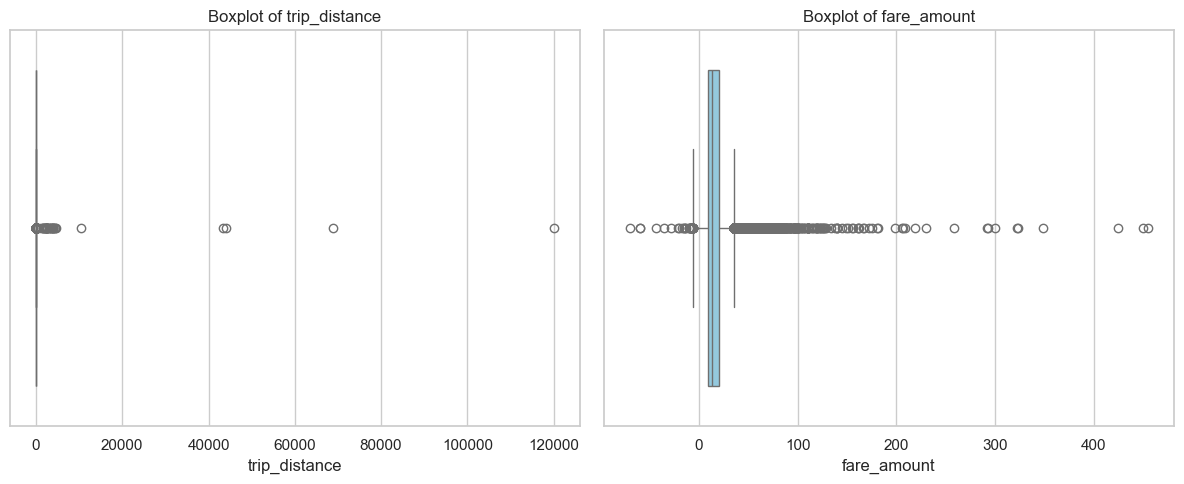

In [185]:
numeric_columns = ['trip_distance', 'fare_amount']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [186]:
# Hitung IQR dan tandai outlier untuk trip_distance dan fare_amount
for col in ['trip_distance', 'fare_amount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[f'is_outlier_{col}'] = (df[col] > upper_bound) | (df[col] < lower_bound)

# Buat dictionary hasil deteksi
outlier_summary = {
    'trip_distance': {
        'Jumlah Outlier': df['is_outlier_trip_distance'].sum(),
        'Proporsi (%)': round(df['is_outlier_trip_distance'].mean() * 100, 2)
    },
    'fare_amount': {
        'Jumlah Outlier': df['is_outlier_fare_amount'].sum(),
        'Proporsi (%)': round(df['is_outlier_fare_amount'].mean() * 100, 2)
    }
}

# Tampilkan hasil dalam bentuk tabel
pd.DataFrame(outlier_summary).T


,Jumlah Outlier,Proporsi (%)
trip_distance,5606.0,8.44
fare_amount,4156.0,6.25


In [187]:
for col in ['trip_distance', 'fare_amount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

**Catatan:**
Dalam analisis ini, outlier pada kolom `trip_distance` dan `fare_amount` dihapus (drop) dari dataset.

Keputusan ini diambil dengan pertimbangan:
- Data outlier berpotensi mempengaruhi distribusi pola permintaan secara tidak wajar.
- Fokus analisis adalah pada pola perjalanan normal, bukan kasus ekstrem.
- Proporsi data outlier relatif kecil sehingga tidak berpengaruh signifikan terhadap jumlah data.

Metode deteksi outlier menggunakan pendekatan IQR, dimana nilai di luar batas Q1 - 1.5×IQR dan Q3 + 1.5×IQR dianggap sebagai outlier.

Meskipun fokus utama analisis ini adalah distribusi jumlah perjalanan berdasarkan waktu, tetap melakukan deteksi outlier pada kolom `trip_distance` dan `fare_amount` sebagai bagian dari pemeriksaan kualitas data.

- Tujuannya adalah untuk memastikan bahwa tidak ada nilai ekstrem yang mendominasi waktu-waktu tertentu dan menimbulkan bias dalam analisis permintaan berdasarkan waktu.

### Pendeteksian Zero Distance & Zero Fare
Langkah ini bertujuan untuk mengidentifikasi potensi anomali berupa perjalanan dengan jarak tempuh atau tarif bernilai nol. Identifikasi ini penting untuk memastikan integritas analisis, karena perjalanan dengan jarak atau biaya nol dapat menyebabkan bias dalam pengukuran efisiensi operasional.

In [188]:
df['is_zero_distance'] = df['trip_distance'] == 0
df['is_zero_fare'] = df['fare_amount'] == 0

Selanjutnya, baris dengan jarak tempuh atau tarif nol akan difilter atau ditandai sebagai data tidak valid.

In [189]:
print(df['is_zero_distance'].sum(), "zero distance rows")
print(df['is_zero_fare'].sum(), "zero fare rows")

1692 zero distance rows
29 zero fare rows


### Penanganan Data Anomali Zero Distance & Zero Fare

Baris dengan nilai `trip_distance = 0` atau `fare_amount = 0` dihapus dari dataset. Hal ini dilakukan untuk menjaga integritas analisis, karena perjalanan dengan jarak atau biaya nol dapat menyebabkan bias dalam pengukuran pola permintaan dan efisiensi operasional layanan taksi.

Baris tersebut berpotensi merupakan hasil kesalahan pencatatan, transaksi void, atau perjalanan yang tidak valid.

In [190]:
print('Jumlah baris sebelum drop:', df.shape)

# Drop baris dengan trip_distance = 0 atau fare_amount = 0
df = df.drop(df[(df['trip_distance'] == 0) | (df['fare_amount'] == 0)].index)

print('Jumlah baris setelah drop:', df.shape)

Jumlah baris sebelum drop: (58897, 38)
Jumlah baris setelah drop: (57196, 38)


---

## 2.10 Data yang Sudah Bersih

Dataset akhir telah melalui berbagai tahap pembersihan data, termasuk:
- Penanganan missing value secara kontekstual.
- Pembuatan format waktu untuk mendukung analisis temporal.
- Penghapusan outlier pada kolom `trip_distance` dan `fare_amount` untuk menjaga representasi pola perjalanan normal.

Dataset akhir kini bersih, terstruktur, dan siap digunakan untuk analisis pola permintaan layanan taksi berdasarkan dimensi waktu dan lokasi.

---

### 2.10.1 Menyimpan Data yang Sudah Bersih

In [191]:
# Simpan dataframe bersih ke file CSV
df.to_csv('DataBersih_nyc_taxi_data.csv', index=False)

In [192]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [
        (df[col] < 0).sum() / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0
        for col in df.columns
    ],
    '0_value(%)': [
        (df[col] == 0).sum() / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0
        for col in df.columns
    ],
    'duplicate_rows': [df.duplicated().sum()] * len(df.columns),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:5] for col in df.columns]
}).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate_rows,n_unique,sample_unique
0,VendorID,int64,0.000,0.0,0.000,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0.000,0.0,0.000,0,56199,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,datetime64[ns],0.000,0.0,0.000,0,56182,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,0.000,0.0,0.000,0,2,"[N, Y]"
4,RatecodeID,float64,0.000,0.0,0.000,0,5,"[1.0, 5.0, 99.0, 4.0, 3.0]"
5,PULocationID,int64,0.000,0.0,0.000,0,181,"[166, 24, 41, 181, 255]"
6,DOLocationID,int64,0.000,0.0,0.000,0,238,"[143, 43, 238, 74, 262]"
7,passenger_count,float64,0.000,0.0,0.000,0,6,"[1.0, 2.0, 4.0, 3.0, 6.0]"
8,trip_distance,float64,0.000,0.0,0.000,0,642,"[2.58, 1.81, 1.3, 1.1, 2.78]"
9,fare_amount,float64,0.000,0.0,0.000,0,1333,"[14.9, 10.7, 6.5, 6.0, 17.7]"


---

## 3. Data Analisis
Analisis ini dilakukan untuk mengeksplorasi pola permintaan taksi berdasarkan dimensi waktu dan lokasi. Hasil dari analisis ini akan membantu dalam merumuskan kebijakan operasional berbasis data, yang mampu mendukung pengambilan keputusan secara lebih tepat. Kebijakan ini ditujukan untuk meningkatkan efisiensi penempatan armada, mengoptimalkan pengaturan armada dan jadwal pengemudi, meminimalisirkan waktu tunggu pelanggan yang lama, serta menekan biaya operasional terutama dalam upaya meminimalkan perjalanan kosong yang tidak menghasilkan pendapatan.

Data yang digunakan merupakan catatan perjalanan untuk bulan Januari 2023. Analisis dilakukan untuk pola lokasi, jam, harian dan mingguan, Namun hasil mingguan masih bersifat indikatif karena hanya mencakup satu bulan observasi. Fokus utama adalah analisis lokasi, harian dan per jam.

### 3.1 Melihat Jumlah Perjalanan Berdasarkan Jam (`pickup_hour`)
Melihat jumlah perjalanan berdasarkan jam penjemputan untuk mengetahui waktu tersibuk dan tersepi dalam sehari (akumulasi semua trip dari tanggal 1 Januari 2023 sampai 31 Januari 2023).

#### Hitung jumlah perjalanan per jam

In [193]:
hitungan_jam_penjemputan = df['pickup_hour'].value_counts().sort_index()
hitungan_jam_penjemputan

pickup_hour
0      897
1      701
2      465
3      390
4      292
5      276
6      761
7     2217
8     2669
9     2909
10    3012
11    3067
12    3116
13    3298
14    3647
15    4347
16    4482
17    4520
18    4631
19    3751
20    2809
21    2074
22    1607
23    1258
Name: count, dtype: int64

### Visualisasi Jumlah Perjalanan berdasarkan Jam
Jumlah Perjalanan per Jam dan persentase kontribusi tiap jam terhadap total perjalanan

In [194]:
persentasi_jam = (hitungan_jam_penjemputan / hitungan_jam_penjemputan.sum() * 100).round(2)
# Hitung jumlah dan persentase perjalanan per jam
pickup_hour_counts = df['pickup_hour'].value_counts().sort_index()
persentasi_jam = (pickup_hour_counts / pickup_hour_counts.sum() * 100).round(2)

# Jumlah perjalanan per jam untuk insight kuantitatif eksplisit
perjalanan_perjam = df.groupby('pickup_hour').size()
persen_jam = perjalanan_perjam / perjalanan_perjam.sum() * 100

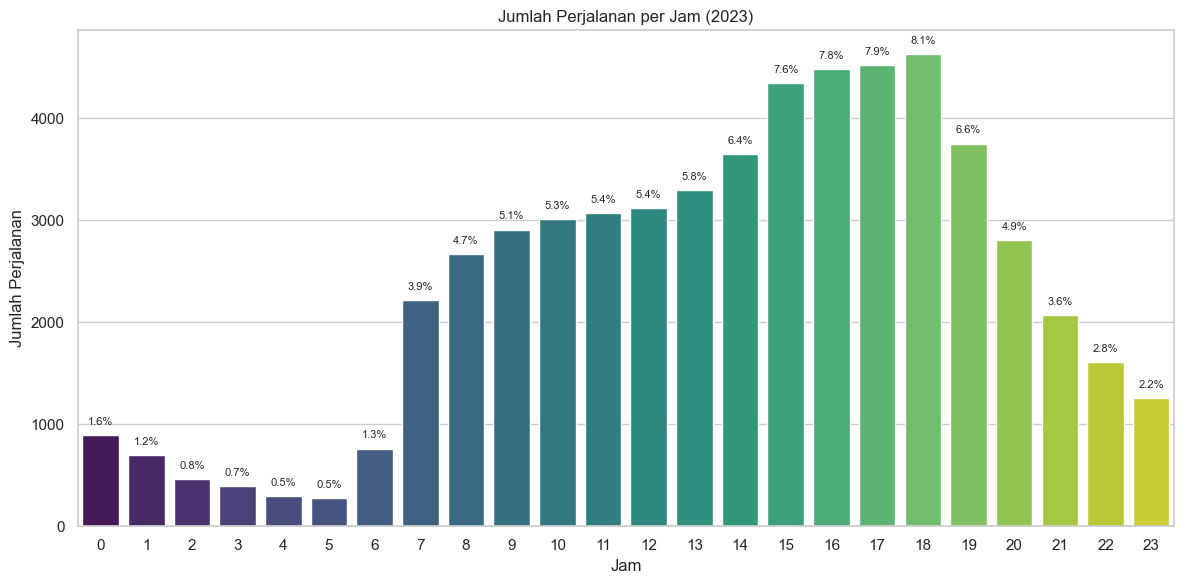

In [195]:
plt.figure(figsize=(12, 6))
sns.barplot(x=perjalanan_perjam.index, y=perjalanan_perjam.values, palette='viridis')
plt.title('Jumlah Perjalanan per Jam (2023)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
for i, (val, pct) in enumerate(zip(perjalanan_perjam, persen_jam)):
    plt.text(i, val + 100, f"{pct:.1f}%", ha='center', fontsize=8)
plt.tight_layout()
plt.show()

- Waktu paling sibuk: **18.00 (jam 6 sore)** → cocok dengan jam pulang kerja dan aktivitas sosial.
- Waktu paling sepi: **05.00 pagi** → sebelum aktivitas kota dimulai.

**3 Peringkat Tertinggi Jam Sibuk berdasarkan persentase:**
- Jam 18 → 8.1%
- Jam 17 → 7.9%
- Jam 16 → 7.8%

### 3.2 Melihat Jadwal Pengemudi berdasarkan Pola Waktu Hari Kerja dan Akhir Pekan

Analisis ini bertujuan untuk memahami perbedaan pola permintaan perjalanan taksi antara hari kerja dan akhir pekan, guna merancang strategi jadwal pengemudi yang lebih efisien.

In [196]:
trip_by_hour_type = df.groupby(['tipe_hari', 'pickup_hour']).size().reset_index(name='jumlah_trip')
trip_by_hour_type = trip_by_hour_type.pivot(index='pickup_hour', columns='tipe_hari', values='jumlah_trip')

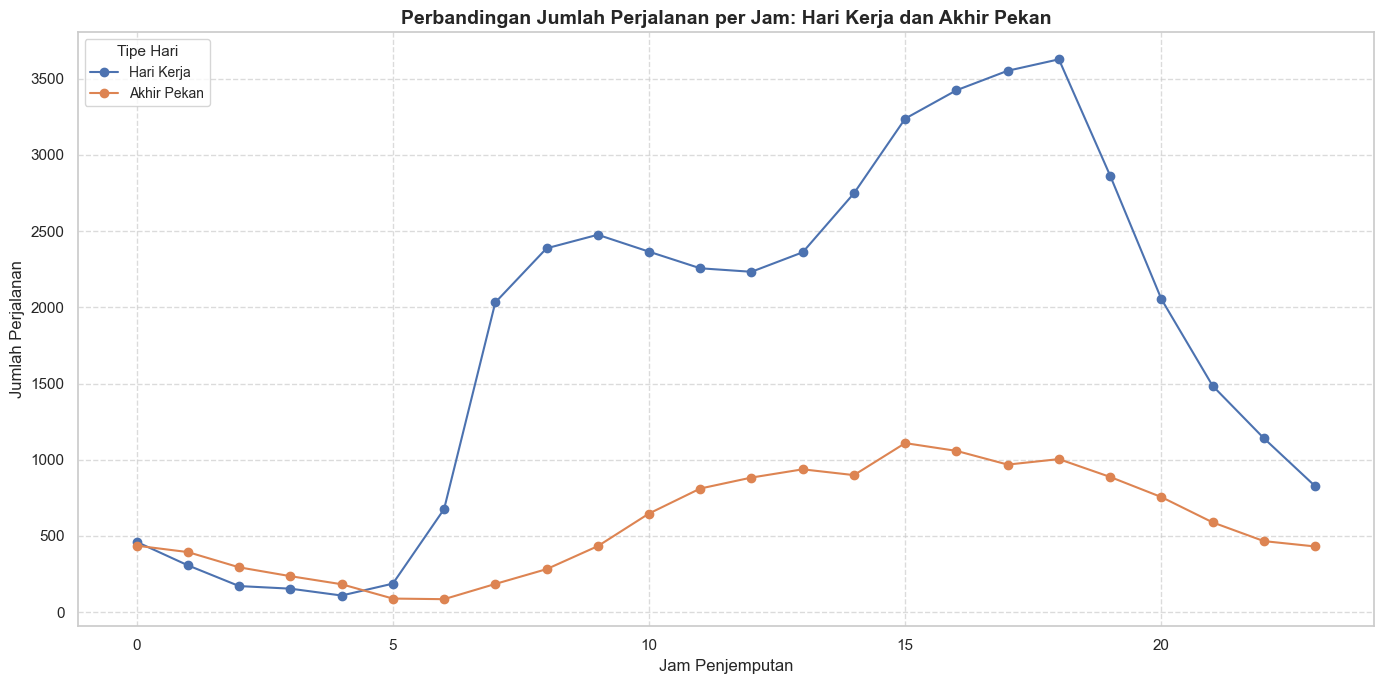

In [197]:
plt.figure(figsize=(14,7))

# Line plot untuk Hari Kerja dan Akhir Pekan
plt.plot(trip_by_hour_type.index, trip_by_hour_type['Hari Kerja'], marker='o', label='Hari Kerja')
plt.plot(trip_by_hour_type.index, trip_by_hour_type['Akhir Pekan'], marker='o', label='Akhir Pekan')

plt.title('Perbandingan Jumlah Perjalanan per Jam: Hari Kerja dan Akhir Pekan', fontsize=14, weight='bold')
plt.xlabel('Jam Penjemputan', fontsize=12)
plt.ylabel('Jumlah Perjalanan', fontsize=12)
plt.legend(title='Tipe Hari', loc='upper left', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- **Hari Kerja**:
  - Permintaan tinggi terjadi pada jam 07.00–09.00 (pagi) dan 16.00–20.00 (sore).
  - Cocok untuk strategi **pembagian jadwal**: jadwal pagi dan jadwal sore.
  - Aktivitas didominasi komuter kantor/sekolah.

- **Akhir Pekan**:
  - Permintaan relatif merata mulai jam 11.00 hingga 21.00.
  - Cocok untuk **jadwal tunggal panjang** (siang hingga malam).
  - Aktivitas didominasi aktivitas rekreasi dan sosial.

### 3.3 Melihat Rata-rata Jumlah Perjalanan berdasarkan Jam

In [198]:
rata_rata_perjalanan_perjam = pickup_hour_counts.mean()
rata_rata_perjalanan_perjam


np.float64(2383.1666666666665)

Rata-rata jumlah perjalanan per jam: 2.842 trip

#### Visualisasi rata-rata perjalanan berdasarkan jam

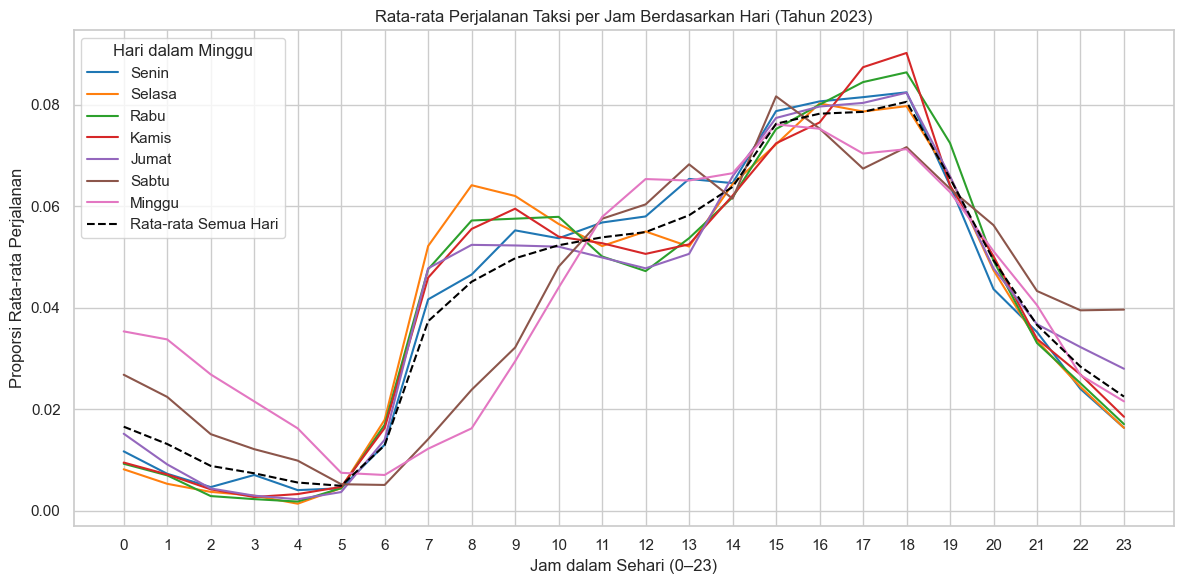

In [199]:
# Hitung jumlah trip per jam per hari
pivot = df.groupby(['day_of_week', 'pickup_hour']).size().unstack(fill_value=0)

# Hitung jumlah hari per kategori
days_count = df['day_of_week'].value_counts()

# Hitung rata-rata trip per jam per hari
avg_per_hour_day = pivot.div(days_count, axis=0)

# Hitung baseline rata-rata semua hari
overall_avg = avg_per_hour_day.mean(axis=0)

# Urutkan hari
# Visualisasi jumlah perjalanan per hari
ordered_days_id = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
avg_per_hour_day = avg_per_hour_day.reindex(ordered_days_id)

# Gunakan palet warna yang konsisten dan urut dari Senin ke Minggu
palette = sns.color_palette("tab10", 7)
day_colors = dict(zip(ordered_days_id, palette))

# Visualisasi
plt.figure(figsize=(12, 6))
for day in avg_per_hour_day.index:
    plt.plot(avg_per_hour_day.columns, avg_per_hour_day.loc[day], label=day, color=day_colors[day])

# Tambahkan garis rata-rata semua hari
plt.plot(avg_per_hour_day.columns, overall_avg, color='black', linestyle='--', label='Rata-rata Semua Hari')

# Label dan legenda dalam Bahasa Indonesia
plt.title('Rata-rata Perjalanan Taksi per Jam Berdasarkan Hari (Tahun 2023)')
plt.xlabel('Jam dalam Sehari (0–23)')
plt.ylabel('Proporsi Rata-rata Perjalanan')
plt.xticks(range(24))
plt.legend(title='Hari dalam Minggu', labels=[
    'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu', 'Rata-rata Semua Hari'
])
plt.grid(True)
plt.tight_layout()
plt.show()

1. Hari Kerja (Senin–Jumat) Terlihat dua puncak utama:
- Pagi (07:00–09:00): Lonjakan permintaan karena aktivitas berangkat kerja/sekolah.
- Sore (16:00–18:00): Puncak kedua karena jam pulang kerja.
- Hari Selasa dan Kamis sedikit lebih sibuk dibanding hari kerja lain.

2. Akhir Pekan (Sabtu–Minggu) Pola permintaan berbeda:
- Aktivitas dimulai lebih siang (sekitar jam 9 pagi)
- Tidak ada dua puncak tajam seperti hari kerja
- Puncak cenderung lebih stabil dan panjang di siang hari (12:00–17:00)

3. Garis Putus-Putus Hitam:
- Menunjukkan rata-rata keseluruhan semua hari.
- Berguna untuk mengidentifikasi apakah suatu hari berada di atas atau di bawah rata-rata.

---

#### Klasifikasikan jam sibuk dan sepi berdasarkan rata-rata

In [200]:
jam_sibuk = pickup_hour_counts[pickup_hour_counts > rata_rata_perjalanan_perjam]
jam_sepi = pickup_hour_counts[pickup_hour_counts < rata_rata_perjalanan_perjam]

print('Jam sibuk:')
print(jam_sibuk)

print('\nJam sepi:')
print(jam_sepi)

Jam sibuk:
pickup_hour
8     2669
9     2909
10    3012
11    3067
12    3116
13    3298
14    3647
15    4347
16    4482
17    4520
18    4631
19    3751
20    2809
Name: count, dtype: int64

Jam sepi:
pickup_hour
0      897
1      701
2      465
3      390
4      292
5      276
6      761
7     2217
21    2074
22    1607
23    1258
Name: count, dtype: int64


#### Peringkat 5 teratas jam paling Ramai

In [201]:
Peringkat_5_teratas_jam_Ramai = pickup_hour_counts.sort_values(ascending=False).head(5)
print("5 Jam Paling Ramai:")
print(Peringkat_5_teratas_jam_Ramai)

5 Jam Paling Ramai:
pickup_hour
18    4631
17    4520
16    4482
15    4347
19    3751
Name: count, dtype: int64


In [202]:
Peringkat_5_teratas_jam_sepi = pickup_hour_counts.sort_values(ascending=True).head(5)
print("5 Jam Paling Sepi:")
print(Peringkat_5_teratas_jam_sepi)

5 Jam Paling Sepi:
pickup_hour
5    276
4    292
3    390
2    465
1    701
Name: count, dtype: int64


---

### 3.4 Melihat Jumlah Perjalanan berdasarkan Hari dalam Seminggu (`day_of_week`)
Melihat pola jumlah perjalanan taksi berdasarkan hari dalam seminggu untuk mengidentifikasi hari tersibuk dan tersepi. Analisis ini berguna untuk perencanaan operasional mingguan, seperti pengaturan armada dan jadwal kerja pengemudi.

#### Visualisasi Jumlah Perjalanan per Hari

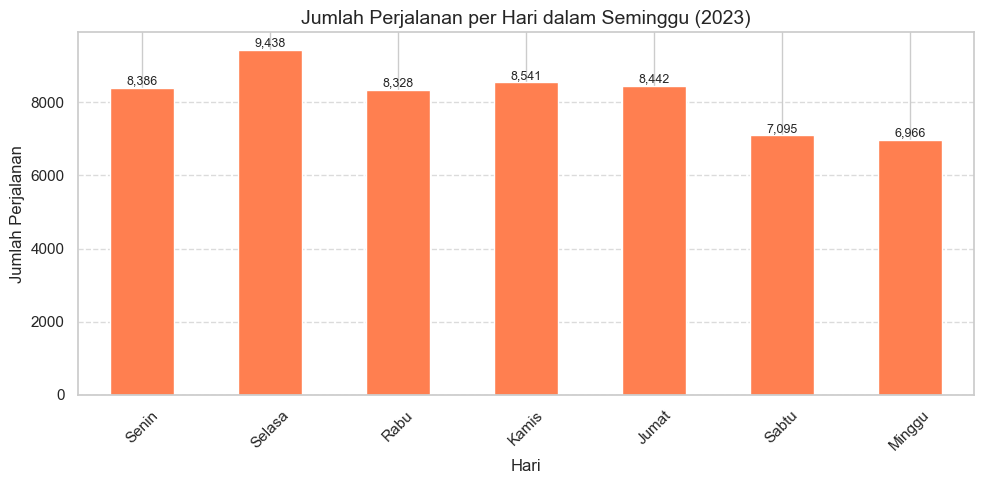

In [203]:
# Visualisasi jumlah perjalanan per hari
ordered_days_id = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
pickup_day_counts = df['day_of_week'].value_counts().reindex(ordered_days_id)

plt.figure(figsize=(10, 5))
pickup_day_counts.plot(kind='bar', color='coral')
plt.title('Jumlah Perjalanan per Hari dalam Seminggu (2023)', fontsize=14)
plt.xlabel('Hari')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Perjalanan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
for i, v in enumerate(pickup_day_counts):
    plt.text(i, v + 100, f"{v:,}", ha='center', fontsize=9)
plt.show()

- Terlihat bahwa hari kerja seperti Selasa dan Kamis memiliki jumlah perjalanan tertinggi.
- Akhir pekan (Sabtu dan Minggu) jauh lebih rendah secara signifikan.
- Ini menunjukkan bahwa kebutuhan akan layanan taksi lebih tinggi dan konsisten selama hari kerja, mendukung strategi alokasi armada maksimum di hari kerja.

#### Hitung jumlah perjalanan per hari berdasarkan day_of_week

#### rata-rata jumlah perjalanan per hari

In [204]:
average_daily = pickup_day_counts.mean()
average_daily

np.float64(8170.857142857143)

----

#### Perbandingan jumlah perjalanan hari sibuk dengan hari sepi

In [205]:
# Hari sibuk: di atas rata-rata
busy_days = pickup_day_counts[pickup_day_counts > average_daily]
print("Hari paling ramai:")
print(busy_days)

Hari paling ramai:
day_of_week
Senin     8386
Selasa    9438
Rabu      8328
Kamis     8541
Jumat     8442
Name: count, dtype: int64


**Hari Tersibuk (di atas rata-rata: 9.744 perjalanan/hari):**
   - Selasa: 11.263
   - Kamis: 10.209
   - Senin: 9.993
   - Jumat: 9.991
   - Rabu: 9.886

Hari kerja menunjukkan tingkat aktivitas layanan taksi yang tinggi dan stabil.

In [206]:
quiet_days = pickup_day_counts[pickup_day_counts < average_daily]
quiet_days
print("Hari paling sepi:")
print(quiet_days)

Hari paling sepi:
day_of_week
Sabtu     7095
Minggu    6966
Name: count, dtype: int64


**Hari Tersepi:**
   - Sabtu: 8.520
   - Minggu: 8.347

Meskipun weekend, permintaan tetap ada, tapi volumenya menurun. Mungkin karena aktivitas komuter menurun.

#### Perbandingan rata-rata Hari Kerja dengan Akhir Pekan

In [207]:
print(pickup_day_counts.index)
print(pickup_day_counts)

Index(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], dtype='object', name='day_of_week')
day_of_week
Senin     8386
Selasa    9438
Rabu      8328
Kamis     8541
Jumat     8442
Sabtu     7095
Minggu    6966
Name: count, dtype: int64


---

### 3.5 Melihat Jumlah Perjalanan berdasarkan hari dan jam

In [208]:
ordered_days_id = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
heatmap_data = df.groupby(['day_of_week', 'pickup_hour']).size().unstack().reindex(ordered_days_id)

#### Visualisasi Jumlah Perjalanan berdasarkan hari dan jam

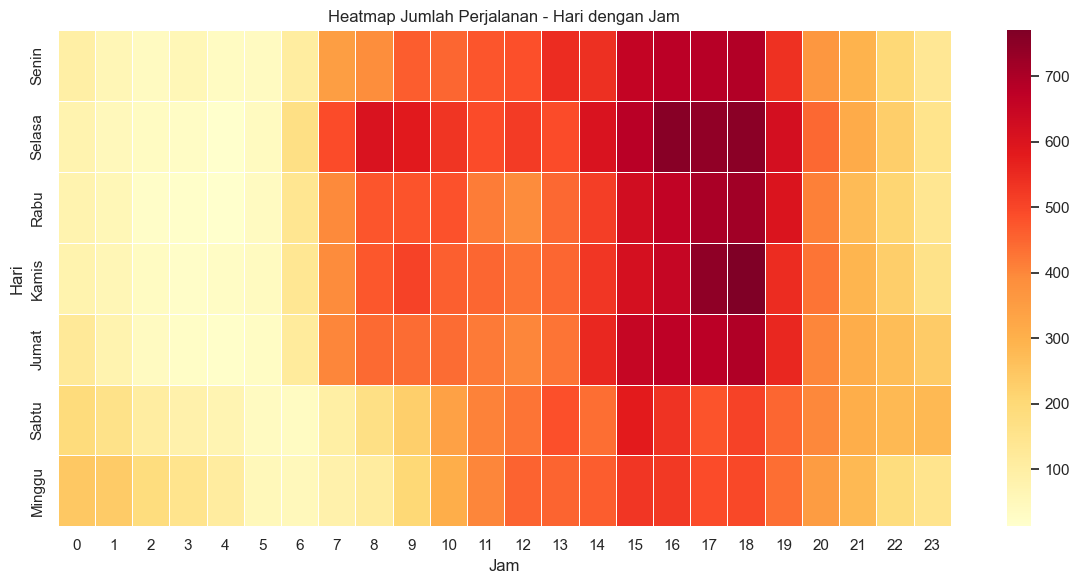

In [209]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='white')
plt.title('Heatmap Jumlah Perjalanan - Hari dengan Jam')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.tight_layout()
plt.show()

1. Pola Umum:
- Aktivitas mulai meningkat pukul 08.00 pagi
- Puncak terjadi antara 16.00–18.00
- Aktivitas menurun drastis setelah pukul 20.00, dan sangat sepi di antara 02.00–05.00

2. Perbedaan Hari:
- Hari kerja (Senin–Jumat) memiliki pola lonjakan tajam di sore hari
- Akhir pekan (Sabtu–Minggu) Permintaan cenderung lebih ramai siang hingga malam, tapi tidak setinggi hari kerja secara total

---

### 3.6 Melihat Jumlah Perjalanan berdasarkan Pola Mingguan (`pickup_week`)
Mengevaluasi jumlah perjalanan taksi berdasarkan minggu untuk mengidentifikasi tren mingguan dan minggu dengan volume ekstrem, sebagai dasar perencanaan operasional jangka pendek.

In [210]:
# Ekstrak minggu dan tahun dari datetime
df['week'] = df['lpep_pickup_datetime'].dt.isocalendar().week
df['year'] = df['lpep_pickup_datetime'].dt.isocalendar().year

# Buat kolom tahun-minggu
df['year_week'] = (
    df['year'].astype(str) + '-W' + df['week'].astype(str).str.zfill(2)
)

#### Visualisasi Jumlah Perjalanan berdasarkan Pola Mingguan 

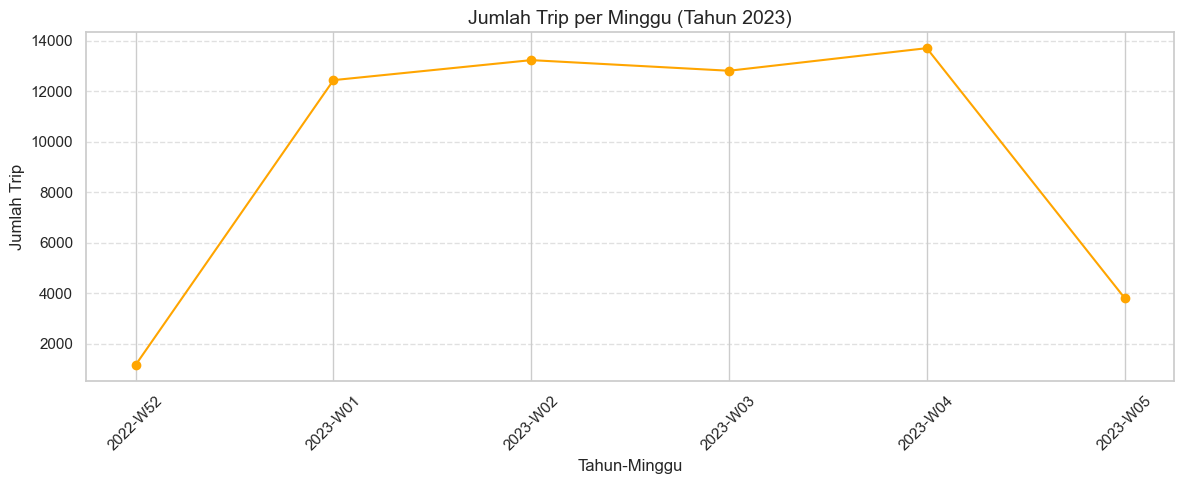

In [211]:
# Hitung jumlah trip per minggu
weekly_trip_2023 = df.groupby('year_week').size()

# Visualisasikan tren mingguan
plt.figure(figsize=(12, 5))
weekly_trip_2023.plot(kind='line', marker='o', color='orange')
plt.title('Jumlah Trip per Minggu (Tahun 2023)', fontsize=14)
plt.xlabel('Tahun-Minggu', fontsize=12)
plt.ylabel('Jumlah Trip', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- Minggu ke-4: menjadi puncak aktivitas layanan taksi
- Minggu ke-5: turun tajam karena hanya mencakup 2 hari (30–31 Januari)
- Minggu ke-52: berada sangat rendah karena hanya berisi 1 hari (1 Januari)

---

### 3.7 Melihat Jumlah Perjalanan berdasarkan Lokasi Penjemputan (Pickup Zone) Tertinggi

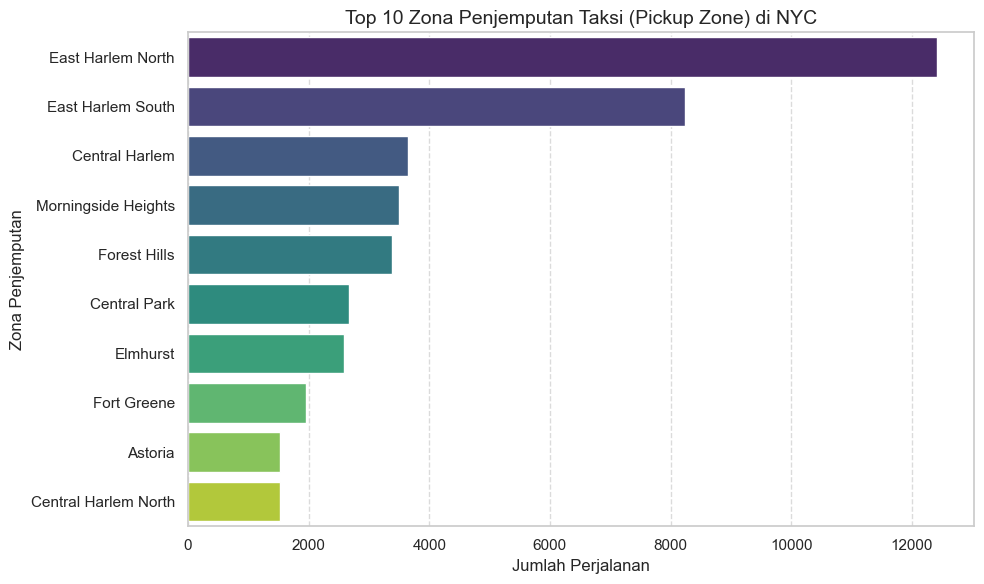

In [212]:
# Hitung jumlah perjalanan per zona pickup
top_pickup_zones = df['pickup_zone'].value_counts().head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=top_pickup_zones.values, y=top_pickup_zones.index, palette='viridis')
plt.title('Top 10 Zona Penjemputan Taksi (Pickup Zone) di NYC', fontsize=14)
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Zona Penjemputan')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Zona-zona berikut merupakan 10 besar lokasi penjemputan taksi (pickup zone) tertinggi selama Januari 2023 di NYC. Hal ini menunjukkan bahwa zona ini merupakan pusat aktivitas masyarakat, kawasan bisnis, wilayah komersial padat, atau area dengan terminal transportasi.

- Zona East Harlem North dan East Harlem South mendominasi sebagai lokasi penjemputan tertinggi, mengindikasikan aktivitas transportasi yang sangat padat di area tersebut.

- Zona-zona ini akan menjadi prioritas utama dalam pengaturan jadwal pengemudi.

- Informasi ini menjadi landasan awal dalam merancang strategi penempatan armada taksi secara optimal dan efisien sesuai pola permintaan aktual di lapangan.

---

### 3.8 Melihat Perbandingan Permintaan Layanan Taksi berdasarkan 10 Zona Penjemputan Tertinggi pada Jam Sibuk (16:00-20:00) dan Jam Sepi (00:00-05:00)

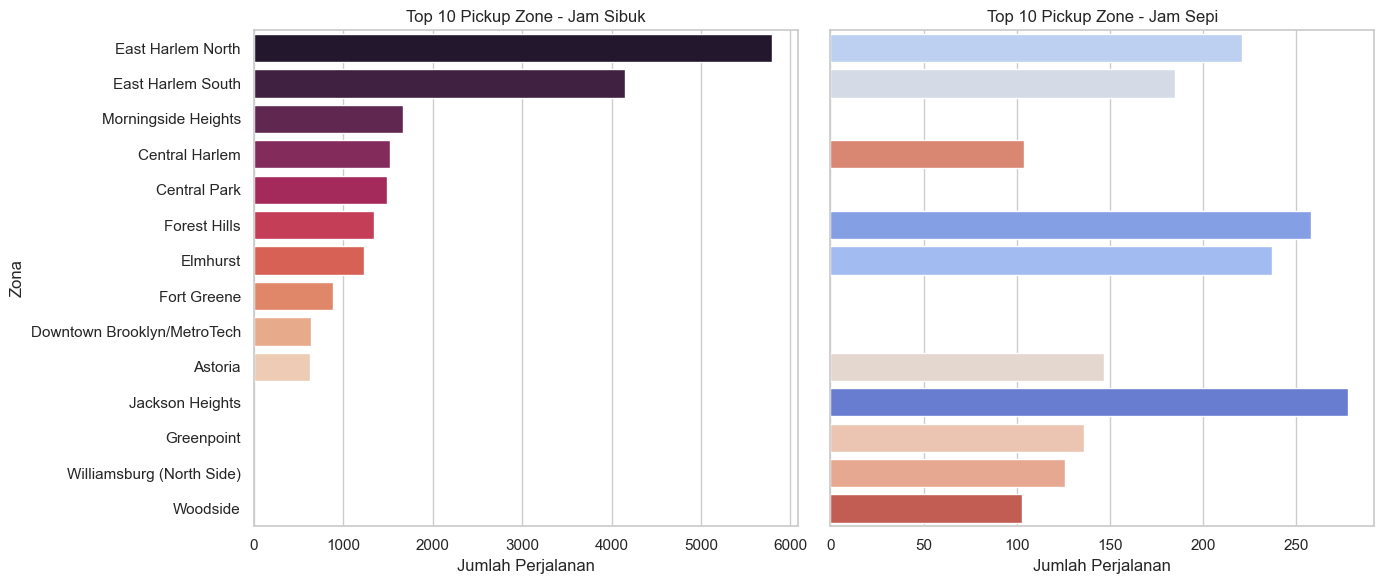

In [213]:
# Definisi jam sibuk dan sepi
jam_sibuk = list(range(8, 11)) + list(range(16, 20))
jam_sepi = list(range(0, 6))                           

# Filter data
df_sibuk = df[df['pickup_hour'].isin(jam_sibuk)]
df_sepi = df[df['pickup_hour'].isin(jam_sepi)]

# Hitung top 10 pickup zone untuk masing-masing kategori
top_zona_sibuk = df_sibuk['pickup_zone'].value_counts().head(10)
top_zona_sepi = df_sepi['pickup_zone'].value_counts().head(10)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(x=top_zona_sibuk.values, y=top_zona_sibuk.index, ax=axes[0], palette='rocket')
axes[0].set_title('Top 10 Pickup Zone - Jam Sibuk')
axes[0].set_xlabel('Jumlah Perjalanan')
axes[0].set_ylabel('Zona')

sns.barplot(x=top_zona_sepi.values, y=top_zona_sepi.index, ax=axes[1], palette='coolwarm')
axes[1].set_title('Top 10 Pickup Zone - Jam Sepi')
axes[1].set_xlabel('Jumlah Perjalanan')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


**Hasil analisis:**

- Zona East Harlem North dan East Harlem South mendominasi jumlah perjalanan baik di jam sibuk maupun jam sepi.

- Beberapa zona seperti Downtown Brooklyn/MetroTech dan Williamsburg justru menunjukkan aktivitas yang cukup tinggi pada jam sepi, menunjukkan kemungkinan area ini merupakan pusat hiburan malam atau kawasan wisata.

- Sebaliknya, zona seperti Morningside Heights dan Forest Hills lebih dominan aktivitasnya pada jam sibuk saja, mengindikasikan area pemukiman atau kawasan pendidikan.

Strategi berbasis pola waktu dan lokasi seperti ini mendukung efektivitas operasional dan efisiensi biaya layanan taksi di NYC.

---

### 3.9 Melihat Perbandingan Zona Penjemputan Hari Kerja dan Akhir Pekan

- Zona pickup mana yang dominan pada hari kerja (Senin–Jumat),
- Zona pickup mana yang aktif pada akhir pekan (Sabtu–Minggu),

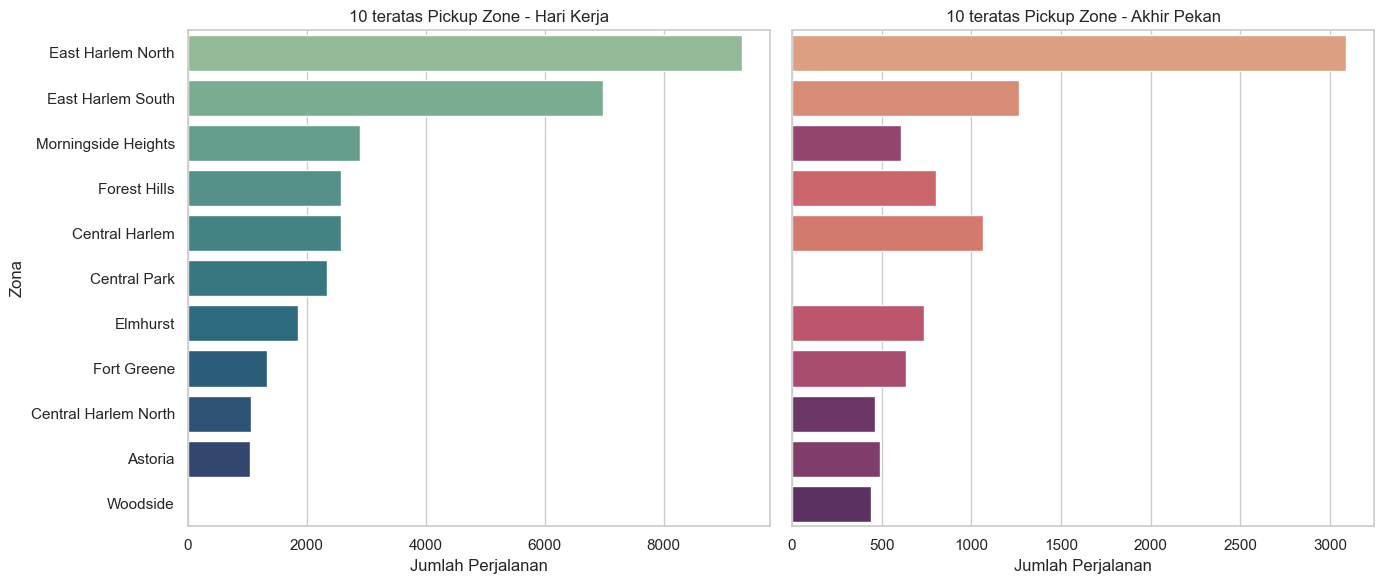

In [214]:
# Definisikan hari kerja dan akhir pekan
hari_kerja = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat']
akhir_pekan = ['Sabtu', 'Minggu']

# Filter data
df_hari_kerja = df[df['day_of_week'].isin(hari_kerja)]
df_akhir_pekan = df[df['day_of_week'].isin(akhir_pekan)]

# Hitung top 10 pickup_zone untuk masing-masing kategori
teratas_zona_hari_kerja = df_hari_kerja['pickup_zone'].value_counts().head(10)
teratas_zona_akhir_pekan = df_akhir_pekan['pickup_zone'].value_counts().head(10)

# Visualisasi berdampingan
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(x=teratas_zona_hari_kerja.values, y=teratas_zona_hari_kerja.index, ax=axes[0], palette='crest')
axes[0].set_title('10 teratas Pickup Zone - Hari Kerja')
axes[0].set_xlabel('Jumlah Perjalanan')
axes[0].set_ylabel('Zona')

sns.barplot(x=teratas_zona_akhir_pekan.values, y=teratas_zona_akhir_pekan.index, ax=axes[1], palette='flare')
axes[1].set_title('10 teratas Pickup Zone - Akhir Pekan')
axes[1].set_xlabel('Jumlah Perjalanan')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


**Interpretasi Awal:**
- Zona-zona dominan pada hari kerja cenderung merupakan kawasan bisnis dan pusat transportasi seperti Midtown atau Central Harlem.
- Pada akhir pekan, muncul zona dengan karakter lebih rekreasional atau perumahan seperti East Harlem, Jackson Heights, atau Williamsburg.

Perbedaan ini menunjukkan pentingnya:
- Menyesuaikan **alokasi armada secara spasial** berdasarkan hari,
- Memberikan **fleksibilitas pengaturan jadwal** pengemudi yang melayani zona-zona aktif di akhir pekan.

---

### 3.10 Melihat Heatmap berdasarkan Hari, Zona Penjemputan, dan Jumlah Perjalanan

- Mengidentifikasi zona dengan permintaan tinggi secara konsisten sepanjang minggu,
- Menemukan pola unik seperti zona yang hanya aktif di akhir pekan atau hari kerja,
- Memberikan dasar lebih presisi untuk **penempatan armada berbasis waktu dan lokasi**.

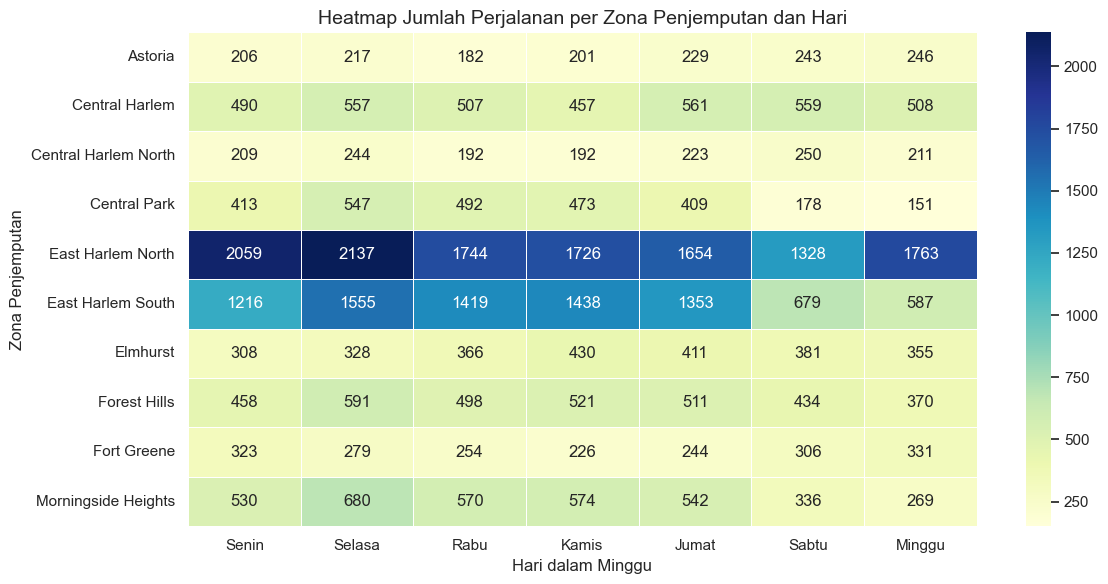

In [215]:
# Ambil hanya 10 zona pickup paling aktif secara umum
top10_zones = df['pickup_zone'].value_counts().head(10).index

# Filter hanya data dengan zona tersebut
df_top_zona = df[df['pickup_zone'].isin(top10_zones)]

# Buat pivot table Hari × Zona
heatmap_data = df_top_zona.pivot_table(
    index='pickup_zone',
    columns='day_of_week',
    values='VendorID',  # atau 'passenger_count', yang penting ada nilainya
    aggfunc='count'
).fillna(0)

# Urutkan kolom agar sesuai urutan hari
ordered_days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
heatmap_data = heatmap_data[ordered_days]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, linecolor='white')
plt.title('Heatmap Jumlah Perjalanan per Zona Penjemputan dan Hari', fontsize=14)
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Zona Penjemputan')
plt.tight_layout()
plt.show()


- Zona seperti *East Harlem North* dan *Central Harlem* aktif sepanjang minggu, menunjukkan permintaan konsisten → cocok untuk penempatan armada reguler.
- Beberapa zona lebih aktif saat akhir pekan seperti *Williamsburg* atau *Astoria*, menunjukkan pola penggunaan non-komuter (hiburan atau kegiatan sosial).
- Hari Minggu umumnya memiliki aktivitas lebih rendah, namun beberapa zona tetap menunjukkan kebutuhan layanan.

Visualisasi ini memperkuat pentingnya strategi **alokasi armada yang dinamis**, bukan hanya berdasarkan waktu, tetapi juga lokasi spesifik.

---

### 3.11 Melihat Perbandingan Pickup dan Dropoff berdasarkan Zona

- Mengidentifikasi zona yang cenderung **lebih banyak dimulai atau diakhiri**,
- Melihat potensi **ketidakseimbangan distribusi armada** (misalnya armada banyak menurunkan di zona tertentu tapi jarang mengambil penumpang di sana),
- Mendukung strategi **redistribusi armada** untuk mengurangi biaya pergerakan kosong.

In [216]:
# Hitung pickup dan dropoff zone
pickup_counts = df['pickup_zone'].value_counts()
dropoff_counts = df['dropoff_zone'].value_counts()

# Gabungkan ke satu DataFrame
zone_comparison = pd.DataFrame({
    'Pickup': pickup_counts,
    'Dropoff': dropoff_counts
}).fillna(0).astype(int)

# Tambahkan kolom selisih
zone_comparison['Selisih'] = zone_comparison['Pickup'] - zone_comparison['Dropoff']

# Ambil 10 zona dengan total aktivitas tertinggi (pickup + dropoff)
zone_comparison['Total_Activity'] = zone_comparison['Pickup'] + zone_comparison['Dropoff']
top10_zone_compare = zone_comparison.sort_values('Total_Activity', ascending=False).head(10)

# Visualisasi
top10_zone_compare[['Pickup', 'Dropoff']]

,Pickup,Dropoff
East Harlem North,12411,3206
East Harlem South,8247,3334
Central Harlem,3639,2509
Morningside Heights,3501,2199
Forest Hills,3383,1464
Central Park,2663,1236
Central Harlem North,1521,2224
Elmhurst,2579,869
Upper East Side North,408,2665
Astoria,1524,976


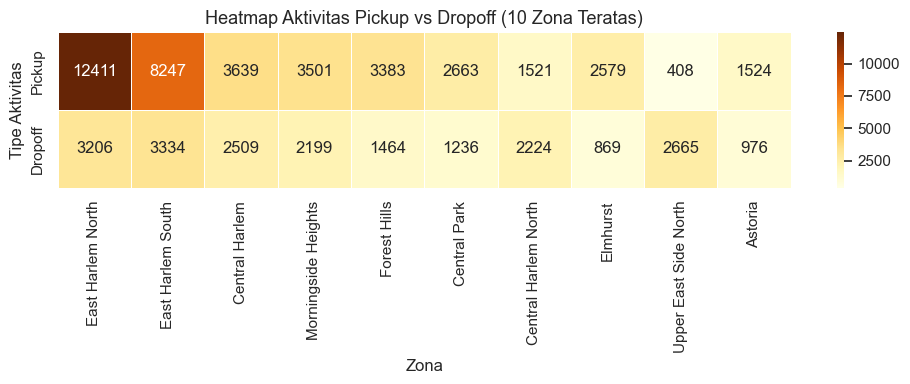

In [217]:
# Sudah ada pickup_counts & dropoff_counts sebelumnya
pickup_counts = df['pickup_zone'].value_counts()
dropoff_counts = df['dropoff_zone'].value_counts()

# Gabungkan ke satu DataFrame
zone_heat = pd.DataFrame({
    'Pickup': pickup_counts,
    'Dropoff': dropoff_counts
}).fillna(0).astype(int)

# Hitung total aktivitas dan ambil 10 teratas
zone_heat['Total'] = zone_heat['Pickup'] + zone_heat['Dropoff']
top10_heat = zone_heat.sort_values('Total', ascending=False).head(10)

# Transpose untuk heatmap (baris = aktivitas, kolom = zona)
heatmap_data = top10_heat[['Pickup', 'Dropoff']].T

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrBr', linewidths=0.5, linecolor='white')
plt.title('Heatmap Aktivitas Pickup vs Dropoff (10 Zona Teratas)', fontsize=13)
plt.xlabel('Zona')
plt.ylabel('Tipe Aktivitas')
plt.tight_layout()
plt.show()

**Interpretasi:**
- Beberapa zona seperti *Midtown Center* memiliki dominasi pickup, menandakan titik awal utama komuter.

- Sebaliknya, zona seperti *Upper East Side* cenderung menjadi titik akhir dropoff — menunjukkan fungsi perumahan atau tujuan aktivitas.

- Ketidakseimbangan seperti ini menjadi dasar penting untuk **menyusun strategi arah balik**, menghindari armada kosong kembali.

- Zona seperti *Central Harlem North* dan *East Harlem* memiliki volume pickup dan dropoff yang relatif seimbang, menunjukkan **fungsi transit dua arah**.

- Sebaliknya, zona dengan gap besar antara pickup dan dropoff bisa mengindikasikan:
  - **Zona asal dominan**: butuh redistribusi armada kembali
  - **Zona tujuan dominan**: mungkin titik akhir perjalanan (hunian, terminal, dan lain-lain)

Analisis ini membantu mengevaluasi apakah armada perlu **diarahkan kembali** ke zona-zona tertentu setelah dropoff untuk menjaga efisiensi.

---

### 3.12 Ketidakseimbangan Pickup dan Dropoff per Zona

In [218]:
# Hitung distribusi pickup dan dropoff per zona
pickup_counts = df['pickup_zone'].value_counts().rename_axis('zone').reset_index(name='pickup_count')
dropoff_counts = df['dropoff_zone'].value_counts().rename_axis('zone').reset_index(name='dropoff_count')

# Gabungkan dua dataframe
zona_analysis = pd.merge(pickup_counts, dropoff_counts, on='zone', how='outer').fillna(0)

# Hitung rasio dan selisih
zona_analysis['pickup_dropoff_ratio'] = zona_analysis['pickup_count'] / (zona_analysis['dropoff_count'] + 1)
zona_analysis['selisih'] = zona_analysis['pickup_count'] - zona_analysis['dropoff_count']

# Kategorikan zona berdasarkan rasio
zona_analysis['kategori'] = zona_analysis.apply(
    lambda row: 'Zona Dropoff Dominan' if row['pickup_dropoff_ratio'] < 0.5 else (
        'Zona Pickup Dominan' if row['pickup_dropoff_ratio'] > 1.5 else 'Zona Seimbang'
    ), axis=1
)

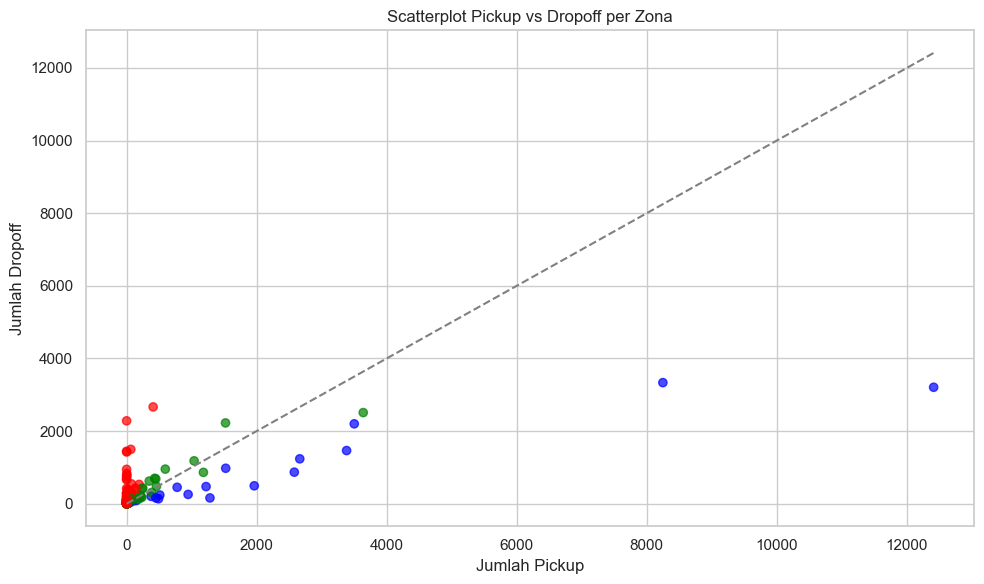

In [219]:
# Scatterplot Pickup vs Dropoff
plt.figure(figsize=(10, 6))
plt.scatter(
    zona_analysis['pickup_count'],
    zona_analysis['dropoff_count'],
    c=zona_analysis['kategori'].map({
        'Zona Pickup Dominan': 'blue',
        'Zona Dropoff Dominan': 'red',
        'Zona Seimbang': 'green'
    }),
    alpha=0.7
)

# Garis referensi y = x
plt.plot(
    [0, max(zona_analysis['pickup_count'].max(), zona_analysis['dropoff_count'].max())],
    [0, max(zona_analysis['pickup_count'].max(), zona_analysis['dropoff_count'].max())],
    color='gray', linestyle='--'
)

# Label dan tampilan
plt.title('Scatterplot Pickup vs Dropoff per Zona')
plt.xlabel('Jumlah Pickup')
plt.ylabel('Jumlah Dropoff')
plt.grid(True)
plt.tight_layout()
plt.show()


- Biru = Zona Pickup Dominan: cocok untuk awal shift

- Merah = Zona Dropoff Dominan: rawan jadi titik mati atau Zona Penumpukan Armada tidak Produktif → perlu redistribusi armada keluar

- Hijau = Zona Seimbang: ideal untuk siaga armada

- Garis abu-abu = y = x (Zona di atas garis: lebih banyak dropoff daripada pickup (risiko menganggur), Zona di bawah garis: banyak pickup, sedikit dropoff → bagus untuk pangkalan armada)

Untuk memberikan gambaran visual tentang ketimpangan distribusi pickup dan dropoff, scatterplot berikut menunjukkan posisi masing-masing zona berdasarkan total pickup dan dropoff yang terjadi selama bulan Januari 2023.

Zona-zona di atas garis diagonal (y = x) memiliki lebih banyak dropoff daripada pickup, yang berpotensi menjadi titik mati (dead zone) bagi armada. Zona-zona tersebut perlu mendapat perhatian khusus dalam strategi redistribusi kendaraan setelah penurunan penumpang.

Sebaliknya, zona-zona di bawah garis cenderung dominan sebagai titik awal penjemputan. Zona-zona ini ideal sebagai titik siaga armada atau awal jadwal pengemudi.

---

### 3.13 Melihat Distribusi Jumlah Perjalanan berdasarkan Wilayah di Hari Kerja dan Akhir Pekan


In [220]:
perjalanan_wilayah = df.groupby(['pickup_borough', 'tipe_hari']).size().reset_index(name='jumlah_trip')

ringkasan_perjalanan_kota = df.groupby('pickup_borough').agg({
    'pickup_zone': 'count',
    'dropoff_zone': 'count'
}).reset_index()

ringkasan_perjalanan_kota.columns = ['Borough', 'Pickup', 'Dropoff']

ringkasan_perjalanan_kota['Total_Activity'] = ringkasan_perjalanan_kota['Pickup'] + ringkasan_perjalanan_kota['Dropoff']
ringkasan_perjalanan_kota = ringkasan_perjalanan_kota.sort_values('Total_Activity', ascending=False)

ringkasan_perjalanan_kota

,Borough,Pickup,Dropoff,Total_Activity
2,Manhattan,35347,35347,70694
3,Queens,14375,14375,28750
1,Brooklyn,6777,6777,13554
0,Bronx,688,688,1376
4,Staten Island,7,7,14


In [221]:
perjalanan_wilayah_pivot = perjalanan_wilayah.pivot(index='pickup_borough', columns='tipe_hari', values='jumlah_trip')
perjalanan_wilayah_pivot = perjalanan_wilayah_pivot.fillna(0)

# Urutkan dari total trip terbanyak
perjalanan_wilayah_pivot['total'] = perjalanan_wilayah_pivot.sum(axis=1)
borough_trip_pivot = perjalanan_wilayah_pivot.sort_values('total', ascending=False).drop('total', axis=1)

<Figure size 1200x600 with 0 Axes>

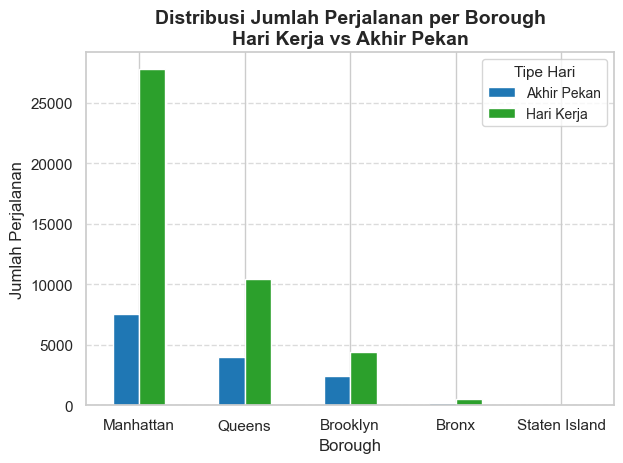

In [235]:
plt.figure(figsize=(12,6))

borough_trip_pivot.plot(kind='bar', color=['#1f77b4', '#2ca02c'])  # Warna custom Hari Kerja vs Akhir Pekan
plt.title('Distribusi Jumlah Perjalanan per Borough\nHari Kerja vs Akhir Pekan', fontsize=14, weight='bold')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Jumlah Perjalanan', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Tipe Hari', fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Wilayah Manhattan selama 1-31 Januari 2023 mendominasi jumlah perjalanan baik pada hari kerja maupun akhir pekan, mencerminkan peran Manhattan sebagai pusat aktivitas utama di NYC.

- Pada wilayah Queens dan Brooklyn, jumlah perjalanan di akhir pekan relatif lebih tinggi dibandingkan hari kerja, menunjukkan tingginya aktivitas sosial dan pergerakan warga lokal.

- Bronx	Wilayah lebih ke area residensial, jauh dari pusat aktivitas komersial.

- Staten Island menjadi area dengan jumlah perjalanan paling sedikit, sejalan dengan karakteristik geografisnya yang terpisah dari daratan utama New York City.

---

### 3.14 Melihat Total Pendapatan per Wilayah

In [223]:
df['total_revenue'] = df[['fare_amount', 'extra', 'mta_tax', 
                          'tolls_amount', 'improvement_surcharge', 
                          'congestion_surcharge']].sum(axis=1)

In [224]:
revenue_borough = df.groupby('pickup_borough')['total_revenue'].sum().reset_index()

revenue_borough = revenue_borough.sort_values('total_revenue', ascending=False)
revenue_borough

,pickup_borough,total_revenue
2,Manhattan,575783.12
3,Queens,235198.83
1,Brooklyn,120825.91
0,Bronx,12214.47
4,Staten Island,113.40


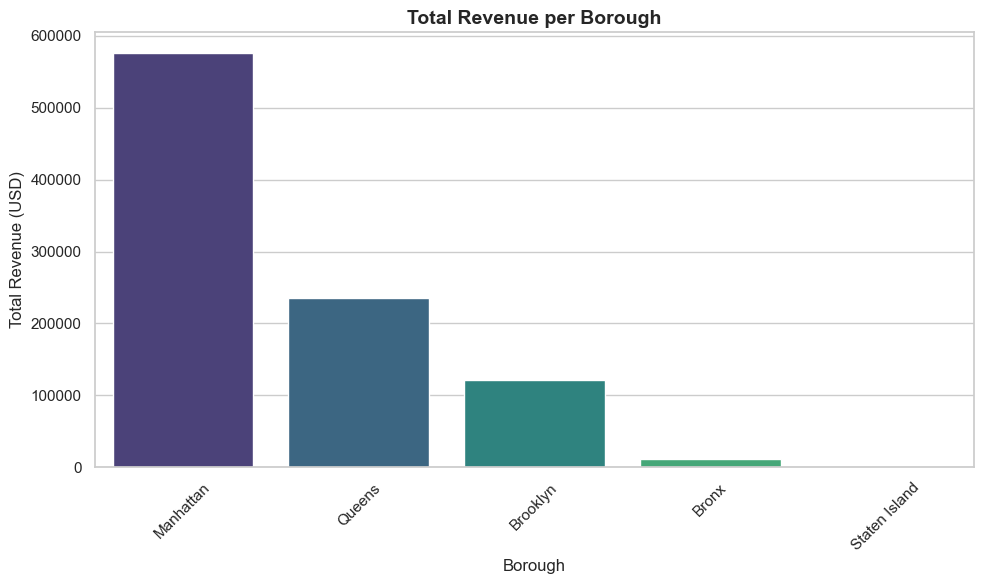

In [225]:
plt.figure(figsize=(10,6))
sns.barplot(data=revenue_borough, x='pickup_borough', y='total_revenue', palette='viridis')

plt.title('Total Revenue per Borough', fontsize=14, weight='bold')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Wilayah Manhattan menghasilkan total pendapatan tertinggi dari perjalanan taksi selama Januari 2023, mencerminkan peran strategisnya sebagai pusat bisnis dan aktivitas ekonomi di NYC. Sebaliknya, Staten Island memberikan kontribusi paling kecil terhadap pendapatan, sejalan dengan karakteristiknya sebagai wilayah residensial terpisah.

Total pendapatan layanan taksi di NYC selama Januari 2023 dari data ini mencapai sekitar 935 ribu USD.

- Wilayah Manhattan berkontribusi paling besar yaitu sekitar 571 ribu USD atau 65% dari total pendapatan.

- Queens dan Brooklyn berada di posisi berikutnya dengan kontribusi masing-masing 233 ribu USD dan 118 ribu USD.

- Bronx dan Staten Island memiliki kontribusi revenue yang sangat kecil, sejalan dengan karakteristik wilayahnya yang lebih residential dan jauh dari pusat aktivitas ekonomi.



---

### 3.15 Melihat Rasio Produktivitas berdasarkan Zona Penjemputan

Rasio Produktivitas dihitung berdasarkan rata-rata jarak tempuh per menit perjalanan di setiap zona penjemputan (`pickup_zone`).

Tujuannya adalah untuk mengetahui Zona mana yang rata-rata durasi perjalanannya lama tapi jaraknya dekat (tidak efisien)

Semakin tinggi rasio produktivitas, semakin efisien layanan taksi di zona tersebut karena perjalanan cenderung lebih jauh dalam waktu yang relatif singkat.

Sebaliknya, rasio produktivitas rendah mengindikasikan adanya kemacetan, rute pendek, atau kepadatan aktivitas di zona tersebut.

In [226]:
# Hitung rata-rata jarak & durasi per zona pickup
avg_distance = df.groupby('pickup_zone')['trip_distance'].mean()
avg_duration = df.groupby('pickup_zone')['trip_duration'].mean()

# Hitung Productivity Ratio
rasio_produktivitas = (avg_distance / avg_duration).sort_values(ascending=False)

# Tampilkan 10 Zona Paling Produktif
rasio_produktivitas.head(10)

pickup_zone
Whitestone                             0.775862
Breezy Point/Fort Tilden/Riis Beach    0.629752
Bath Beach                             0.478680
Van Cortlandt Park                     0.430000
Yorkville East                         0.419305
Springfield Gardens North              0.416089
Highbridge Park                        0.381344
Pelham Bay                             0.357729
Jamaica Estates                        0.318843
South Jamaica                          0.313158
dtype: float64

### Visualisasi Rasio Produktivitas berdasarkan Zona Penjemputan

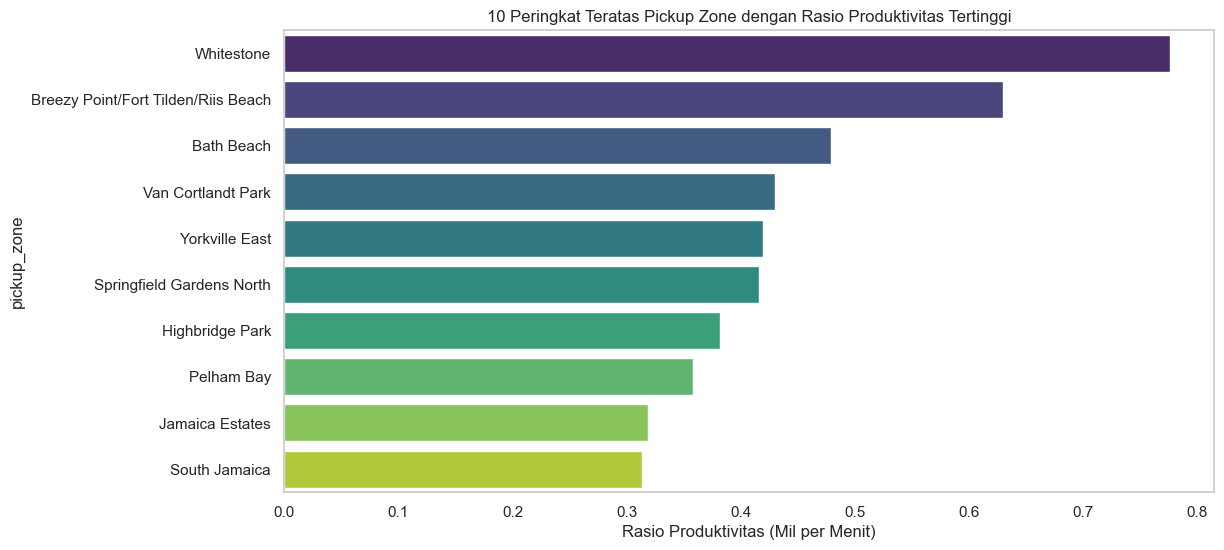

In [227]:
plt.figure(figsize=(12, 6))
sns.barplot(x=rasio_produktivitas.head(10).values, y=rasio_produktivitas.head(10).index, palette='viridis')
plt.xlabel('Rasio Produktivitas (Mil per Menit)')
plt.title('10 Peringkat Teratas Pickup Zone dengan Rasio Produktivitas Tertinggi')
plt.grid(axis='x')
plt.show()

Berdasarkan hasil perhitungan rasio produktivitas per zona penjemputan (pickup zone), diperoleh beberapa temuan penting:

- Zona dengan rasio produktivitas tertinggi umumnya berada di area pinggiran kota atau di sepanjang jalur utama menuju bandara. Hal ini menunjukkan bahwa perjalanan di zona tersebut cenderung lebih efisien karena jarak tempuh relatif jauh dengan durasi perjalanan yang singkat (minim hambatan lalu lintas).

- Sebaliknya, zona dengan rasio produktivitas rendah didominasi oleh area Midtown dan pusat kota NYC yang padat aktivitas, rawan kemacetan, serta banyak perhentian di sepanjang perjalanan.

- Zona-zona dengan rasio produktivitas tertinggi umumnya berada di area pinggiran kota NYC seperti Queens, Brooklyn, Bronx, dan Staten Island.

---

### 3.16 Melihat Rata-rata Jarak Perjalanan berdasarkan Jam Penjemputan

Analisis ini bertujuan untuk mengetahui pola rata-rata jarak perjalanan (`trip_distance`) berdasarkan jam penjemputan (`pickup_hour`).

In [228]:
avg_distance_per_hour = df.groupby('pickup_hour')['trip_distance'].mean()

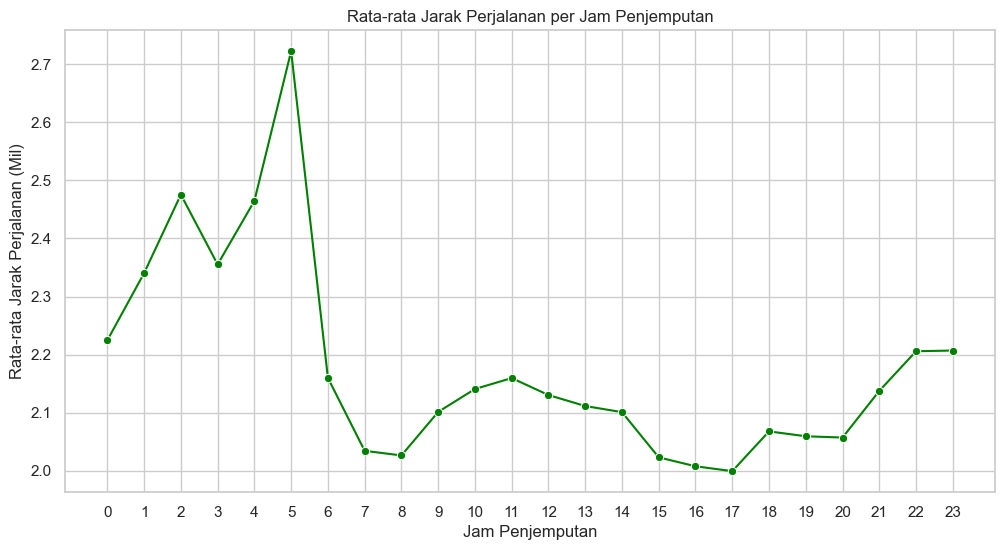

In [229]:
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_distance_per_hour.index, y=avg_distance_per_hour.values, marker='o', color='green')
plt.xlabel('Jam Penjemputan')
plt.ylabel('Rata-rata Jarak Perjalanan (Mil)')
plt.title('Rata-rata Jarak Perjalanan per Jam Penjemputan')
plt.grid(True)
plt.xticks(range(0,24))
plt.show()

### Hasil Analisis:

Hasil analisis menunjukkan bahwa rata-rata jarak perjalanan taksi di NYC cenderung lebih jauh pada periode tengah malam hingga subuh (00.00 - 05.00), dan kembali meningkat setelah pukul 20.00.

Sebaliknya, pada jam-jam kerja (07.00 - 17.00), rata-rata jarak perjalanan lebih pendek, mencerminkan mobilitas lokal dengan tujuan jarak dekat di dalam kota.

hal ini menjawab armada tetap disiapkan meski permintaan rendah

---

### 3.17 Melihat Kontribusi Pendapatan berdasarkan Zona Penjemputan

Analisis ini dilakukan untuk mengetahui zona-zona dengan total kontribusi pendapatan tertinggi berdasarkan akumulasi nilai `total_amount` pada setiap zona penjemputan (`pickup_zone`).

**Hitung total pendapatan (total_amount) per zona**

In [230]:
pendapatan_per_zona = df.groupby('pickup_zone')['total_amount'].sum().sort_values(ascending=False)

**Hitung kontribusi persentasenya**

In [231]:
persentasi_pendapatan = (pendapatan_per_zona / pendapatan_per_zona.sum()) * 100

In [232]:
revenue_df = pd.DataFrame({
    'Total_Pendapatan': pendapatan_per_zona,
    'Persentase_Kontribusi (%)': persentasi_pendapatan
}).round(2)

revenue_df.head(10)

,Total_Pendapatan,Persentase_Kontribusi (%)
pickup_zone,,
East Harlem North,225148.29,21.61
East Harlem South,147484.10,14.15
Morningside Heights,64595.02,6.20
Central Harlem,57724.43,5.54
Forest Hills,55909.63,5.37
Central Park,53807.44,5.16
Elmhurst,48498.35,4.65
Fort Greene,38138.80,3.66
Washington Heights South,26376.98,2.53


### Visualisasi Kontribusi Pendapatan berdasarkan Zona Penjemputan

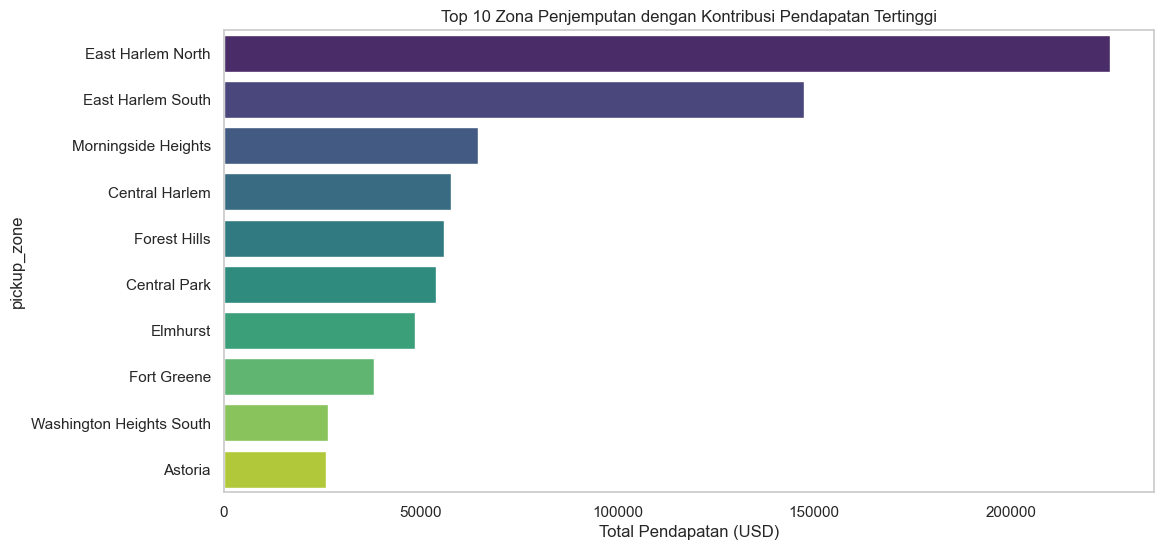

In [233]:
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_df.head(10)['Total_Pendapatan'], y=revenue_df.head(10).index, palette='viridis')
plt.xlabel('Total Pendapatan (USD)')
plt.title('Top 10 Zona Penjemputan dengan Kontribusi Pendapatan Tertinggi')
plt.grid(axis='x')
plt.show()

In [236]:
# Load data bersih
df = pd.read_csv("DataBersih_nyc_taxi_data.csv")

# Cek jumlah perjalanan per pickup_borough
pickup_summary = df['pickup_borough'].value_counts(dropna=False)

# Cek jumlah perjalanan per dropoff_borough
dropoff_summary = df['dropoff_borough'].value_counts(dropna=False)

pickup_summary, dropoff_summary

(pickup_borough
 Manhattan        35347
 Queens           14375
 Brooklyn          6777
 Bronx              688
 Staten Island        7
 NaN                  2
 Name: count, dtype: int64,
 dropoff_borough
 Manhattan        35458
 Queens           14017
 Brooklyn          6052
 Bronx             1647
 NaN                 15
 Staten Island        7
 Name: count, dtype: int64)

- Zona seperti `JFK Airport (Bandara Internasional JFK)`, `Midtown Center (Kawasan Pusat Kota Manhattan)`, dan `Upper East Side (Kawasan Permukiman Premium)` merupakan kontributor terbesar terhadap total pendapatan.
- Zona-zona tersebut memiliki volume perjalanan tinggi dan/atau tarif perjalanan yang besar karena rute jauh atau penggunaan layanan premium.

---

## Kesimpulan dan Rekomendasi

Analisis ini dilakukan untuk mendukung perusahaan dalam merumuskan strategi pengaturan armada dan jadwal pengemudi yang lebih efektif dan efisien di Kota New York, dengan menggunakan data perjalanan taksi periode Januari 2023 sebagai dasar evaluasi dan perencanaan operasional untuk periode selanjutnya.

### Kesimpulan

1. Pola Permintaan Berdasarkan Waktu
- Permintaan perjalanan tertinggi terjadi pada jam-jam sibuk, terutama antara pukul 16:00 - 20:00, yang berkaitan dengan aktivitas pulang kerja.
- Jam-jam sepi terjadi pada rentang pukul 00:00 - 05:00 dengan jumlah perjalanan yang jauh lebih rendah, tetapi berdasrakan rata-rata jarak perjalanan taksi di NYC cenderung lebih jauh pada periode tengah malam hingga subuh (00.00 - 05.00). hal ini menjawab armada tetap disiapkan meski permintaan rendah.
- Hari kerja (Senin-Jumat) memiliki volume perjalanan lebih stabil dibandingkan akhir pekan, namun akhir pekan menunjukkan adanya lonjakan di zona-zona tertentu yang berkaitan dengan aktivitas hiburan dan rekreasi.
- Hari tersibuk terjadi pada hari Jumat, sedangkan hari paling sepi umumnya adalah hari Minggu.
- Heatmap waktu menunjukkan konsistensi pola permintaan tinggi pada jam-jam tertentu (peak hours) di hampir semua hari, sementara pola sebaran perjalanan berdasarkan minggu (pickup_week) tidak menunjukkan fluktuasi signifikan karena data hanya mencakup 1 bulan observasi.

2. Pola Permintaan Berdasarkan Lokasi
- Zona penjemputan (pickup zone) tertinggi didominasi oleh area East Harlem North dan East Harlem South, menunjukkan area ini sebagai pusat aktivitas penjemputan taksi.
- Perbandingan pola permintaan pada jam sibuk dan jam sepi menunjukkan bahwa zona-zona pusat kota seperti Midtown, East Harlem, dan Downtown Brooklyn tetap aktif dalam kedua kondisi waktu tersebut.
- Zona penjemputan pada hari kerja didominasi oleh area perkantoran dan pusat aktivitas bisnis seperti Midtown Center, sedangkan pada akhir pekan terdapat peningkatan aktivitas di zona-zona dengan fungsi hiburan seperti Williamsburg dan Downtown Brooklyn.
- Heatmap berdasarkan hari dan zona menunjukkan bahwa zona-zona tertentu aktif secara konsisten sepanjang minggu, sementara beberapa zona hanya aktif di hari tertentu (misalnya akhir pekan saja).

3. Perbandingan Pickup dan Dropoff
- Terdapat ketidakseimbangan antara jumlah pickup dan dropoff di beberapa zona.
- Zona seperti Midtown Center memiliki dominasi sebagai zona penjemputan utama, sedangkan Upper East Side lebih dominan sebagai zona dropoff, mengindikasikan area hunian.
- Zona seperti Central Harlem North memiliki distribusi pickup dan dropoff yang seimbang, menunjukkan area transit dua arah.

4. Distribusi Perjalanan per Wilayah
- Mayoritas perjalanan terjadi di wilayah Manhattan, diikuti oleh Brooklyn dan Queens.
- Pola distribusi ini serupa baik di hari kerja maupun akhir pekan, meskipun pada akhir pekan ada peningkatan aktivitas di wilayah Brooklyn yang memiliki banyak area hiburan.

5. Total Pendapatan per Wilayah
- Pendapatan terbesar berasal dari wilayah Manhattan, mencerminkan intensitas aktivitas ekonomi dan tarif rata-rata perjalanan yang lebih tinggi.
- Brooklyn dan Queens berkontribusi secara signifikan namun masih jauh di bawah Manhattan.

6. Rasio Produktivitas Berdasarkan Zona
- Zona dengan rasio produktivitas tertinggi (jarak tempuh per menit perjalanan) berada di area pinggiran kota seperti Queens, Bronx, dan Staten Island. Hal ini menunjukkan bahwa perjalanan di area ini cenderung lebih jauh dengan waktu tempuh yang relatif singkat.
- Sebaliknya, zona dengan rasio produktivitas rendah berada di pusat kota seperti Midtown, yang padat aktivitas, rawan kemacetan, dan sering kali perjalanannya singkat karena jarak antar lokasi yang dekat.

7. Rata-rata Jarak Perjalanan
- Rata-rata jarak perjalanan terpendek terjadi pada jam-jam kerja (07:00 - 17:00), mencerminkan perjalanan jarak dekat dalam kota.
- Rata-rata jarak perjalanan meningkat pada malam hingga dini hari (00:00 - 05:00), mencerminkan perjalanan antar wilayah atau menuju bandara.

8. Kontribusi Pendapatan Berdasarkan Zona Penjemputan
- Zona-zona yang mendominasi jumlah perjalanan seperti East Harlem North dan East Harlem South juga memberikan kontribusi pendapatan yang besar.
- Namun, zona seperti Midtown Center tetap menjadi salah satu zona dengan kontribusi pendapatan tertinggi meskipun volumenya tidak setinggi zona East Harlem, kemungkinan karena jarak tempuh dan tarif dasar yang lebih tinggi di area pusat bisnis.

**Ringkasan**

Analisis terhadap data historis perjalanan taksi di New York City pada Januari 2023 mengungkap pola permintaan yang sangat dipengaruhi oleh waktu dan lokasi. Permintaan tertinggi terjadi pada hari kerja di jam 16:00–20:00, dengan konsentrasi zona penjemputan di Midtown Center, East Harlem, dan Downtown Brooklyn. Zona-zona ini menunjukkan kombinasi antara volume penumpang tinggi dan tarif rata-rata yang besar, menjadikannya pusat aktivitas utama layanan taksi.

Sebaliknya, permintaan menurun drastis pada pukul 00:00–05:00, terutama di zona pemukiman, namun tetap muncul kebutuhan layanan di area bandara. Akhir pekan menunjukkan pergeseran zona permintaan ke area hiburan dan wisata seperti Williamsburg dan Times Square, menandakan pentingnya fleksibilitas distribusi armada.

Selain itu, terdapat proporsi signifikan perjalanan dengan jarak tempuh pendek namun frekuensi tinggi di zona sentral Manhattan, serta perjalanan jarak jauh dari bandara ke pinggiran kota yang menghasilkan pendapatan tinggi. Beberapa zona juga teridentifikasi sebagai zona produktivitas rendah dengan waktu tunggu lama dan jumlah perjalanan rendah, berisiko menurunkan efisiensi armada jika tidak ditangani secara dinamis.

---

### Rekomendasi

**1. Pengaturan Jadwal Pengemudi Berbasis Permintaan**

- Gunakan pola waktu permintaan untuk membagi jadwal pengemudi ke dalam 3 blok:

    - Pagi - Siang (06:00–14:00): permintaan stabil
    - Sore - Malam (14:00–22:00): puncak permintaan
    - Malam - Subuh (22:00–06:00): layanan terbatas, fokus bandara

- jadwal fleksibel tambahan di jam sibuk (16:00–20:00) di zona Midtown dan Brooklyn.

**2. Distribusi Armada Berbasis Zona Produktivitas**

- Fokuskan armada di zona dengan rasio perjalanan tinggi dan tarif rata-rata besar:

    - Midtown Center, East Harlem, Downtown Brooklyn.

- Hindari penumpukan armada di zona dengan rasio dropoff tinggi tapi pickup rendah seperti zona pemukiman (Upper East Side).

- Terapkan sistem redistribusi otomatis berdasarkan permintaan waktu nyata (contoh: setelah dropoff di zona hunian, arahkan ulang ke pusat aktivitas atau ke zona ideal sebagai titik siaga armada atau awal jadwal pengemudi).

**3. Pengelolaan Hari Kerja dan Akhir Pekan**

- Hari kerja: Dominasi permintaan di pusat bisnis dan perkantoran → distribusi armada fokus Manhattan tengah.

- Akhir pekan: Fokus ke zona hiburan (Chelsea, Williamsburg, Times Square), siapkan armada malam hari tambahan.

**4. Armada Khusus untuk Perjalanan Jarak Jauh dan Bandara**

- Tempatkan unit khusus di area:

    - Bandara JFK, LaGuardia, Newark (EWR).

- Waktu operasional armada bandara: 00:00–06:00 untuk antisipasi perjalanan pulang malam dan wisatawan.

**5. Optimalisasi Rute dan Efisiensi Perjalanan**

- Gunakan data perjalanan historis untuk merekomendasikan rute tercepat dan minim kemacetan di jam sibuk.

- Prioritaskan penggunaan rute alternatif di area rawan macet seperti Midtown dan Financial District.

**6. Rekomendasi Jangka Panjang: Sistem Monitoring Berbasis Data**

- Implementasikan dasbor pemantauan waktu nyata untuk:

    - Heatmap permintaan harian
    - Pergerakan armada
    - Waktu tunggu & rasio produktivitas per zona

Lakukan evaluasi rutin terhadap pola permintaan bulanan untuk menyesuaikan strategi jadwal pengemudi dan pengaturan armada secara adaptif.

Seluruh pola waktu dan lokasi yang dianalisis menunjukkan bahwa optimalisasi operasional tidak hanya bergantung pada volume permintaan, tapi juga pada karakteristik perjalanannya (jarak, durasi, zona). Oleh karena itu, strategi penempatan armada dan jadwal pengemudi perlu mempertimbangkan faktor produktivitas per zona dan redistribusi armada secara adaptif.